# Jupyter notebook containing the required python scripts to replicate the plots from the paper entitled "Evidence from APOGEE for the presence of a major building block of the halo buried in the inner Galaxy" 

The paper can be found here: https://ui.adsabs.harvard.edu/abs/2020arXiv200710374H/abstract. In order to run the notebook, one must obtain the APOGEE DR16 catalogue, cross matched with Gaia DR2, and the EAGLE numerical simulations. One must also compute the IoM using galpy in a McMillan potential.

In [1]:
# load in the correct modules
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import tqdm
import hdbscan
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# LOAD THE DATA
path = '/Users/qpasa/Desktop/Master/data/dr16astroNN_McMillan17P.fits'
tb = fits.open(path)
data = tb[1].data 

In [12]:
fehs = data.field('FE_H')
mgfe = data.field('MG_FE')
lz = data.field('Lz')
jz = data.field('jz')
jr = data.field('jr')
E = data.field('E')
ecc = data.field('e')
snr = data.field('SNR')
alfe = data.field('AL_FE')
alfe_err = data.field('AL_FE_ERR')
fehs_err = data.field('FE_H_ERR')
nife = data.field('NI_FE')
cfe = data.field('C_FE')
nfe = data.field('N_FE')
sfe = data.field('S_FE')
tife = data.field('TI_FE')
vR = data.field('vR')
vT = data.field('vT')
vZ = data.field('vZ')
vx = data.field('vx')
vy = data.field('vy')
vz = data.field('vz')
x = data.field('X')
y = data.field('Y')
z = data.field('Z')
vlos = data.field('VHELIO_AVG')
sife = data.field('SI_FE')
kfe = data.field('K_FE')
ofe = data.field('O_FE')
pfe = data.field('P_FE')
cafe = data.field('CA_FE')
mnfe = data.field('MN_FE')
cofe = data.field('CO_FE')
crfe = data.field('CR_FE')
vfe = data.field('V_FE')
cufe = data.field('CU_FE')
tife = data.field('TI_FE')
Rgal = data.field('Rgal')
Zgal = data.field('Zgal')
apo_id = data.field('APOGEE_ID')
pname = data.field('PROGRAMNAME')
logg = data.field('LOGG')
teff = data.field('TEFF')
dist = data.field('weighted_dist')
zmax = data.field('zmax')
apo = data.field('rap')
peri = data.field('rperi')
pmra = data.field('pmra')
pmdec = data.field('pmdec')
fehs_err = data.field('FE_H_ERR')
ra = data.field('RA')
dec = data.field('DEC')
vlos= data.field('VHELIO_AVG')
mgfe_err = data.field('MG_FE_ERR')
dist_err = data.field('weighted_dist_error')
aspcap_flag = data.field('ASPCAPFLAG')
star_flag = data.field('STARFLAG')

In [13]:
# LOAD THE DATA FOR THE GC LIST IN APOGEE
path = '/Users/qpasa/Desktop/Master/data/'
file = 'complete_fulldr16_nofehs.fits'
tb2 = fits.open(path+file)
data2 = tb2[1].data
gc_star_ids = data2.field('APOGEE_ID')
print('There are '+str(len(gc_star_ids))+' stars within 2 virial radii and 2 values of the velocity dispersion for all Galactic GCs')

There are 6022 stars within 2 virial radii and 2 values of the velocity dispersion for all Galactic GCs


In [14]:
jr = np.array(jr)*220*8
lz = np.array(lz)*220*8
jz = np.array(jz)*220*8
vR = np.array(vR)*220
vT = np.array(vT)*220
vZ = np.array(vZ)*220
vx = np.array(vx)*220
vy = np.array(vy)*220
vz = np.array(vz)*220
x = np.array(x)*8
y = np.array(y)*8
z = np.array(z)*8
Rgal = np.array(Rgal)*8
Zgal = np.array(Zgal)*8
peri = np.array(peri)*8
apo = np.array(apo)*8
zmax = np.array(zmax)*8
dist = np.array(dist)/1e3 #distances are in pc
dist_err = np.array(dist_err)/1e3

In [70]:
# Clean the initial data
mask_gcs = np.isin(apo_id,gc_star_ids)
mask = (snr >= 70) &(fehs>-1.7) & (teff > 4000) & (teff < 6000) & (logg < 3) & (logg > 1) & ((dist_err/dist)<0.20) & (mask_gcs==False) & (fehs > -10) & (mgfe > -10) & (mnfe > -10) & (aspcap_flag==0)  

print('There are '+str(len(apo_id[mask]))+' stars in the parent sample')

There are 148549 stars in the parent sample


In [71]:
rads = np.sqrt(Rgal**2+Zgal**2)

# Fig 1

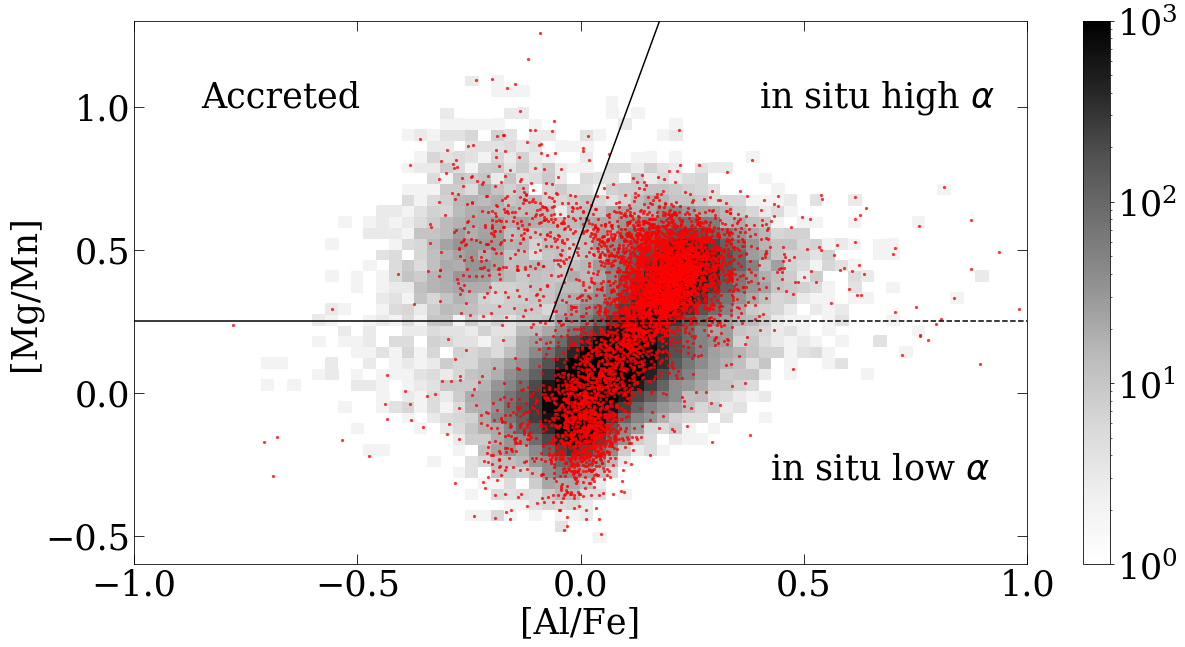

In [72]:
import matplotlib.axes as ax
from matplotlib.colors import LogNorm

# Get current size
fig_size = plt.rcParams["figure.figsize"]

fig_size[0] = 20
fig_size[1] = 10

mgmn = mgfe - mnfe


#Figure settings (font sizes of ticks and labels)
labs=35
tcks=35

#plt.scatter(feh,alfe,c=cn, cmap='rainbow',alpha=0.4,s=30,lw=0,vmin=-0.7,vmax=0.7)
plt.hist2d(alfe[mask], mgmn[mask], norm=LogNorm(), bins=(70, 50),range=[[-1.,1],[-0.6,1.3]], cmap='Greys')
plt.clim(1,1000)
#Figure settings (labels, log scale, limits, legend position)    
cb= plt.colorbar()
#cb.set_label('Stars per bin',size=labs)
cb.ax.tick_params(labelsize=tcks)
#plt.yscale('log')
plt.xlabel('[Al/Fe]',size=labs)
plt.scatter(alfe[(rads<4)&mask], mgmn[(rads<4)&mask], c='red', alpha=0.8,s=10,lw=0)
#plt.scatter(scu_alfe, scu_mgmn, c='blue', alpha=0.8,s=30,lw=0)
plt.ylabel('[Mg/Mn]',size=labs)
plt.tick_params(direction='in',right=True,top=True,length=10)
plt.xticks((np.arange(-3.0,1.5,step=0.5)),fontsize=tcks)
plt.yticks((np.arange(-1.5,1.5,step=0.5)),fontsize=tcks)
plt.tick_params(which='minor',direction='in',right=True,top=True,length=2)
plt.xlim(-1.0,1.0)
plt.ylim(-0.6,1.3)
plt.text(-0.85,1,'Accreted',fontsize=35)
plt.text(0.4,-0.3,' in situ low $\\alpha$',fontsize=35)
plt.text(0.4,1.0,'in situ high $\\alpha$',fontsize=35)


#Attention to different selection here!!!
plt.plot([-1,-0.07],[0.25,0.25], c='black')
plt.plot([-0.07,1.0],[0.25,0.25], '--', c='black')
x = np.arange(-0.07,0.4,0.01)
plt.plot(x,4.25*x+0.5475, 'k', c='black')


Define the accreted mask

In [73]:
acc_mask = ( (mnfe > -10) & ((mgmn >= 0.25) & (alfe < -0.07)) |  ((mgmn >= 4.25*alfe+0.5475) & (alfe >= -0.07)) )

# Fig 2

In [93]:
mw_model = np.loadtxt('/Users/qpasa/Desktop/Master/data/mw_abundances_hayes_model.txt')
alfes_mw_model = mw_model[:,9]
mgfes_mw_model = mw_model[:,8]
mnfes_mw_model = mw_model[:,17]
mgmn_mw_model = mgfes_mw_model-mnfes_mw_model

ges_model = np.loadtxt('/Users/qpasa/Desktop/Master/data/ges_abundances_hayes_model.txt')
alfes_ges_model = ges_model[:,9]
mgfes_ges_model = ges_model[:,8]
mnfes_ges_model = ges_model[:,17]
time =ges_model[:,0]


mgmn_ges_model = mgfes_ges_model-mnfes_ges_model


In [94]:
alfes_dots_mw = [alfes_mw_model[9],alfes_mw_model[32],alfes_mw_model[164]]
mgmn_dots_mw = [mgmn_mw_model[9],mgmn_mw_model[32],mgmn_mw_model[164]]
alfes_dots_ges = [alfes_ges_model[9],alfes_ges_model[32],alfes_ges_model[164]]
mgmn_dots_ges = [mgmn_ges_model[9],mgmn_ges_model[32],mgmn_ges_model[164]]


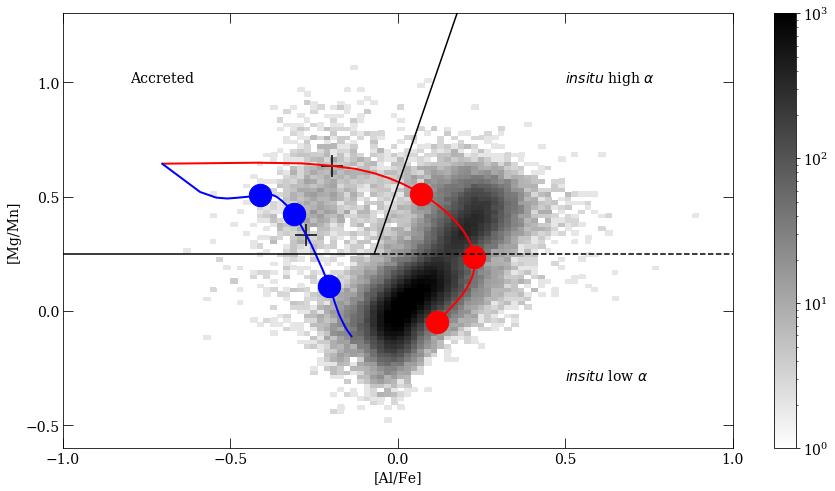

In [95]:
import matplotlib.axes as ax
# Get current size
plt.figure(figsize=(15,8))
plt.rc('font',family='serif',size=16)
mgmn = mgfe - mnfe
rads = np.sqrt(Rgal**2+Zgal**2)

plt.hist2d(alfe[mask], mgmn[mask], norm=LogNorm(),bins= 100,range=[[-1.,1],[-0.6,1.3]], cmap='binary')
plt.clim(1,1000)
cb= plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.plot(alfes_mw_model,mgmn_mw_model,c='r',lw=2)
plt.plot(alfes_ges_model,mgmn_ges_model,c='b',lw=2)
plt.scatter(alfes_dots_mw,mgmn_dots_mw,c='r',s=500)
plt.scatter(alfes_dots_ges,mgmn_dots_ges,c='b',s=500)
plt.scatter(alfes_mw_model[3],mgmn_mw_model[3],c='k',marker='+',s=500)
plt.scatter(alfes_ges_model[59],mgmn_ges_model[59],c='k',marker='+',s=500)
plt.xlabel('[Al/Fe]',size=14)
plt.ylabel('[Mg/Mn]',size=14)
plt.tick_params(direction='in',right=True,top=True,length=10)
plt.xticks((np.arange(-3.0,1.5,step=0.5)),fontsize=14)
plt.yticks((np.arange(-1.5,1.5,step=0.5)),fontsize=14)
plt.text(-0.8,1,'Accreted',fontsize=14)
plt.text(0.5,1,r'$\mathit{in situ}$ high $\alpha$',fontsize=14)
plt.text(0.5,-0.3,r'$\mathit{in situ}$ low $\alpha$',fontsize=14)
plt.tick_params(which='minor',direction='in',right=True,top=True,length=2)
plt.xlim(-1.0,1.0)
plt.ylim(-0.6,1.3)
plt.plot([-1,-0.07],[0.25,0.25], c='black')
plt.plot([-0.07,1.0],[0.25,0.25], '--', c='black')
x = np.arange(-0.07,0.4,0.01)
plt.plot(x,4.25*x+0.5475, 'k', c='black')
# plt.savefig('/Users/danny/Desktop/IGS-structure/ig-structure/plots/figure1_GCE.pdf', format='pdf', dpi=400, bbox_inches='tight')


# Fig 3

(array([  0., 100., 200., 300., 400., 500.]),
 <a list of 6 Text yticklabel objects>)

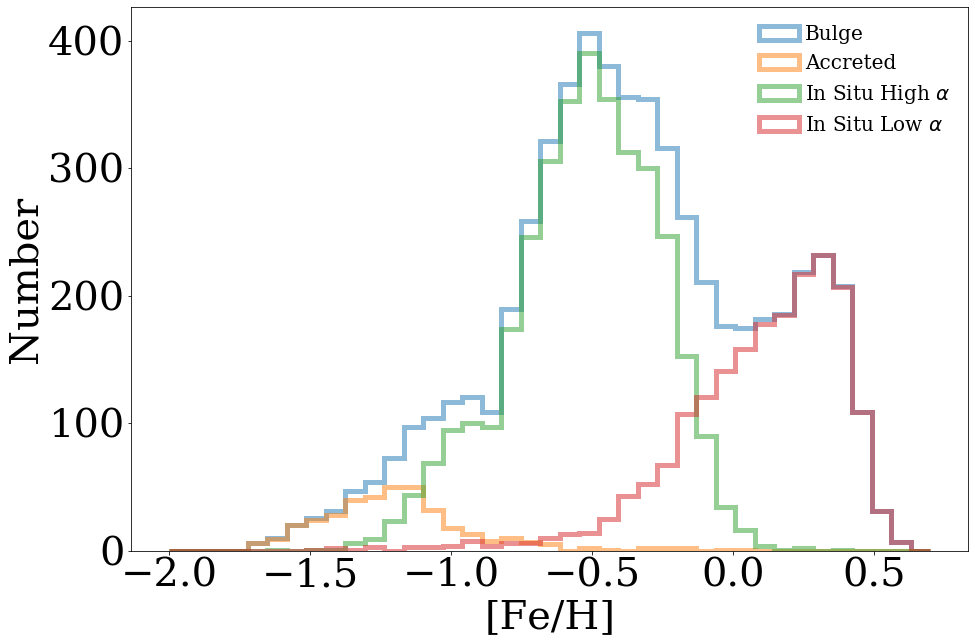

In [75]:
#Get current size
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15 
fig_size[1] = 10

#Figure settings (font sizes of ticks and labels) 
labs=40 
tcks=40

bins = np.linspace(-2.0,0.7,40)
plt.hist(fehs[(rads<4)&mask], bins, alpha=0.5, histtype='step',linewidth=5, density=False, label='Bulge')
plt.hist(fehs[acc_mask&(rads<4)&mask], bins, alpha=0.5, histtype='step',linewidth=5, density=False, label='Accreted')
plt.hist(fehs[~acc_mask&(rads<4)&mask&(mgfe>0.2)], bins, alpha=0.5, histtype='step',linewidth=5, density=False, label='In Situ High $\\alpha$')
plt.hist(fehs[~acc_mask&(rads<4)&mask&(mgfe<0.2)], bins, alpha=0.5, histtype='step',linewidth=5, density=False, label='In Situ Low $\\alpha$')
#plt.hist(feh_bg2kpc, bins, alpha=0.5, density=False, label='In Situ')
#plt.arrow(-1.4,150,0,-40,width=0.01,head_width=0.001,head_length=0.3,length_includes_head=True,color='black')
#plt.arrow(-0.9,250,0,-40,width=0.01,head_width=0.001,head_length=0.3,length_includes_head=True,color='black')
plt.xlabel('[Fe/H]',size=labs)
plt.ylabel('Number',size=labs)
plt.legend(frameon=False,fontsize=20,handletextpad=0.3,loc='upper right')
plt.xticks(fontsize=tcks)
plt.yticks(fontsize=tcks)


# Fig 4

2362 2369


/Users/qpasa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:72: UserWarning: Calling figure.constrained_layout, but figure not setup to do constrained layout.  You either called GridSpec without the fig keyword, you are using plt.subplot, or you need to call figure or subplots with the constrained_layout=True kwarg.


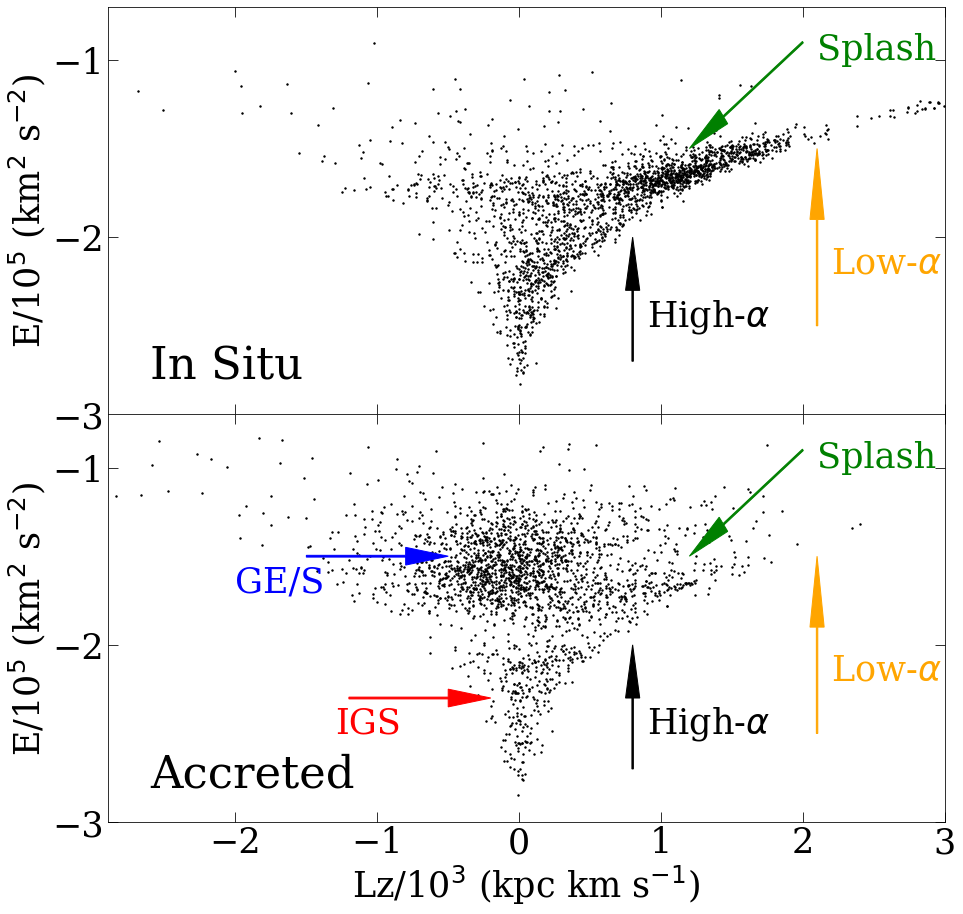

In [89]:
import matplotlib.gridspec as gridspec
fig= plt.figure(figsize=(15,15),constrained_layout=True)

gs = gridspec.GridSpec(2,1)
gs.update(wspace=0, hspace=0) # set the spacing between axes. 

# #mask_acc_mp = ( (feh_acc < -0.7) & (feh_acc > -1.0) )
# mask_acc_mp = ( (feh_acc < -0.8) )
# lz_acc_mp = lz_acc[mask_acc_mp]
# ener_acc_mp = ener_acc[mask_acc_mp]

# mask_acc_mr = feh_acc > -0.8
# lz_acc_mr = lz_acc[mask_acc_mr]
# ener_acc_mr = ener_acc[mask_acc_mr]

# #mask_ins_mp = ( (feh_ins < -0.7) & (feh_ins > -1.0) )
# mask_ins_mp = ( (feh_ins < -0.8) )
# lz_ins_mp = lz_ins[mask_ins_mp]
# ener_ins_mp = ener_ins[mask_ins_mp]

# mask_ins_mr = feh_ins > -0.8
# lz_ins_mr = lz_ins[mask_ins_mr]
# ener_ins_mr = ener_ins[mask_ins_mr]

plt.subplot(gs[0])
plt.scatter(lz[mask&~acc_mask&(fehs<-0.8)]/1e3,E[mask&~acc_mask&(fehs<-0.8)]/1e5,s=2,c='black',rasterized=True)
plt.yticks((np.arange(-50,0,step=1)),fontsize=tcks)
plt.ylabel('E/10$^5$ (km$^2$ s$^{-2}$)',size=labs)
plt.xlim(-2.9,3)
plt.ylim(-3,-0.7)
plt.tick_params(direction='in',right=True,top=True,length=10,labelright=False,labelbottom=False)
plt.arrow(2.0,-0.9,-0.8,-0.6,width=0.01,head_width=0.1,head_length=0.3,length_includes_head=True,color='green')
plt.text(2.1,-1.0,'Splash',fontsize=35,color='green')
plt.arrow(0.8,-2.7,0.0,0.7,width=0.01,head_width=0.1,head_length=0.3,length_includes_head=True,color='black')
plt.text(0.9,-2.5,'High-$\\alpha$',fontsize=35,color='black')
plt.arrow(2.1,-2.5,0,1,width=0.01,head_width=0.1,head_length=0.4,length_includes_head=True,color='orange')
plt.text(2.2,-2.2,'Low-$\\alpha$',fontsize=35,color='orange')
plt.text(-2.6,-2.8,'In Situ',fontsize=45,color='black')


plt.subplot(gs[1])
plt.scatter(lz[mask&acc_mask&(fehs<-0.8)]/1e3,E[mask&acc_mask&(fehs<-0.8)]/1e5,s=2,c='black',rasterized=True)
#plt.scatter(lz_acc_mr,ener_acc_mr,s=20,c='red',rasterized=True)
#plt.scatter(lz_td_acc,ener_td_acc,s=2,c='orange',rasterized=True)
#plt.scatter(lz_le_acc,ener_le_acc,s=2,c='red',rasterized=True)
plt.xticks((np.arange(-10,10,step=1)),fontsize=tcks)
plt.yticks((np.arange(-50,0,step=1)),fontsize=tcks)
plt.xlabel('Lz/10$^3$ (kpc km s$^{-1}$)',size=labs)
plt.ylabel('E/10$^5$ (km$^2$ s$^{-2}$)',size=labs)
plt.xlim(-2.9,3)
plt.ylim(-3,-0.7)
plt.tick_params(direction='in',right=True,top=True,length=10,labelright=False)
plt.arrow(2.0,-0.9,-0.8,-0.6,width=0.01,head_width=0.1,head_length=0.3,length_includes_head=True,color='green')
plt.text(2.1,-1.0,'Splash',fontsize=35,color='green')
plt.arrow(0.8,-2.7,0.0,0.7,width=0.01,head_width=0.1,head_length=0.3,length_includes_head=True,color='black')
plt.text(0.9,-2.5,'High-$\\alpha$',fontsize=35,color='black')
plt.arrow(2.1,-2.5,0,1,width=0.01,head_width=0.1,head_length=0.4,length_includes_head=True,color='orange')
plt.text(2.2,-2.2,'Low-$\\alpha$',fontsize=35,color='orange')
plt.arrow(-1.5,-1.5,1,0,width=0.01,head_width=0.1,head_length=0.3,length_includes_head=True,color='blue')
plt.text(-2.0,-1.7,'GE/S',fontsize=35,color='blue')
plt.arrow(-1.2,-2.3,1,0,width=0.01,head_width=0.1,head_length=0.3,length_includes_head=True,color='red')
plt.text(-1.3,-2.5,'IGS',fontsize=35,color='red')
plt.text(-2.6,-2.8,'Accreted',fontsize=45,color='black')



x = np.arange(0.3,0.7,0.01)
#plt.plot(x,0.6*x-2.23, 'k', c='red')

print(len(lz[mask&~acc_mask&(fehs<-0.8)]),len(lz[mask&acc_mask&(fehs<-0.8)]))

# plt.savefig('fig4.png',format='png',bbox_inches='tight')



# Fig 5

/Users/qpasa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in greater
/Users/qpasa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in less
/Users/qpasa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in greater
/Users/qpasa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in less
/Users/qpasa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in greater
/Users/qpasa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in less
/Users/qpasa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in greater
/Users/qpasa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launch

Text(1.2, -2.5, 'High-$\\alpha$, $e<0.4$')

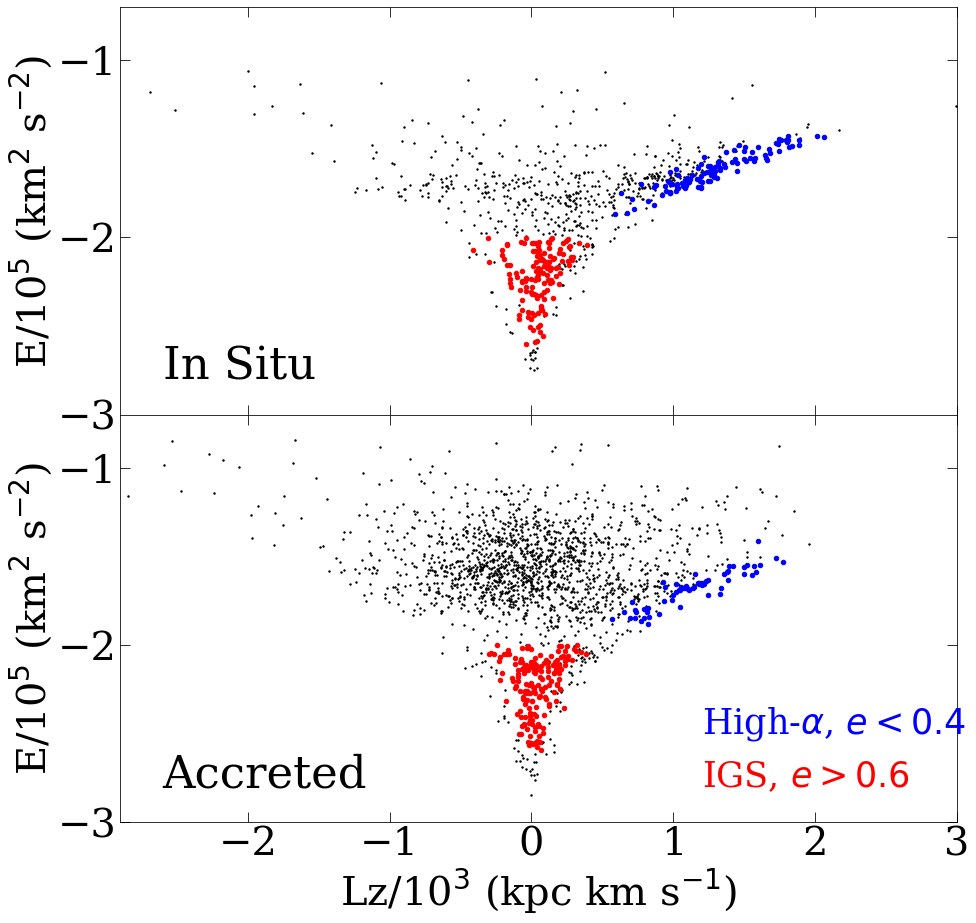

In [77]:
fig= plt.figure(figsize=(15,15),constrained_layout=True)

gs = gridspec.GridSpec(2,1)
gs.update(wspace=0, hspace=0) # set the spacing between axes.

#Limits defining subsamples
feh_limit = -1
td_ecc_up = 0.4
td_ener_up = -1.4
td_ener_lo = -1.9

le_ecc_lo = 0.6
le_ener_up = -2.0
le_ener_lo = -2.6


plt.subplot(gs[0])
plt.scatter(lz[mask&~acc_mask&(fehs<-1)]/1e3,E[mask&~acc_mask&(fehs<-1)]/1e5,s=2,c='black',rasterized=True)
plt.scatter(lz[mask&~acc_mask&(E>-190000)&(E<-140000)&(ecc<0.4)&(fehs<-1)&(lz>0)]/1e3,E[mask&~acc_mask&(lz>0)&(E>-190000)&(E<-140000)&(ecc<0.4)&(fehs<-1)]/1e5,s=20,c='blue',rasterized=True)
plt.scatter(lz[mask&~acc_mask&(E>-260000)&(E<-200000)&(ecc>0.6)&(fehs<-1)]/1e3,E[mask&~acc_mask&(E>-260000)&(E<-200000)&(ecc>0.6)&(fehs<-1)]/1e5,s=20,c='red',rasterized=True)
plt.yticks((np.arange(-50,0,step=1)),fontsize=tcks)
plt.ylabel('E/10$^5$ (km$^2$ s$^{-2}$)',size=labs)
plt.xlim(-2.9,3)
plt.ylim(-3,-0.7)
plt.tick_params(direction='in',right=True,top=True,length=10,labelright=False,labelbottom=False)
plt.text(-2.6,-2.8,'In Situ',fontsize=45,color='black')

#IGS - ACCRETED

plt.subplot(gs[1])
plt.scatter(lz[mask&acc_mask&(fehs<-1)]/1e3,E[mask&acc_mask&(fehs<-1)]/1e5,s=2,c='black',rasterized=True)
plt.scatter(lz[mask&acc_mask&(E>-190000)&(E<-140000)&(ecc<0.4)&(lz>0)&(fehs<-1)]/1e3,E[mask&acc_mask&(lz>0)&(E>-190000)&(E<-140000)&(ecc<0.4)&(fehs<-1)]/1e5,s=20,c='blue',rasterized=True)
plt.scatter(lz[mask&acc_mask&(E>-260000)&(E<-200000)&(ecc>0.6)&(fehs<-1)]/1e3,E[mask&acc_mask&(E>-260000)&(E<-200000)&(ecc>0.6)&(fehs<-1)]/1e5,s=20,c='red',rasterized=True)
plt.xticks((np.arange(-10,10,step=1)),fontsize=tcks)
plt.yticks((np.arange(-50,0,step=1)),fontsize=tcks)
plt.xlabel('Lz/10$^3$ (kpc km s$^{-1}$)',size=labs)
plt.ylabel('E/10$^5$ (km$^2$ s$^{-2}$)',size=labs)
plt.xlim(-2.9,3)
plt.ylim(-3,-0.7)
plt.tick_params(direction='in',right=True,top=True,length=10,labelright=False)
plt.text(-2.6,-2.8,'Accreted',fontsize=45,color='black')
plt.text(1.2,-2.8,'IGS, $e>0.6$',fontsize=35,color='red')
plt.text(1.2,-2.5,'High-$\\alpha$, $e<0.4$',fontsize=35,color='blue')



# Fig 6

/Users/qpasa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:88: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 


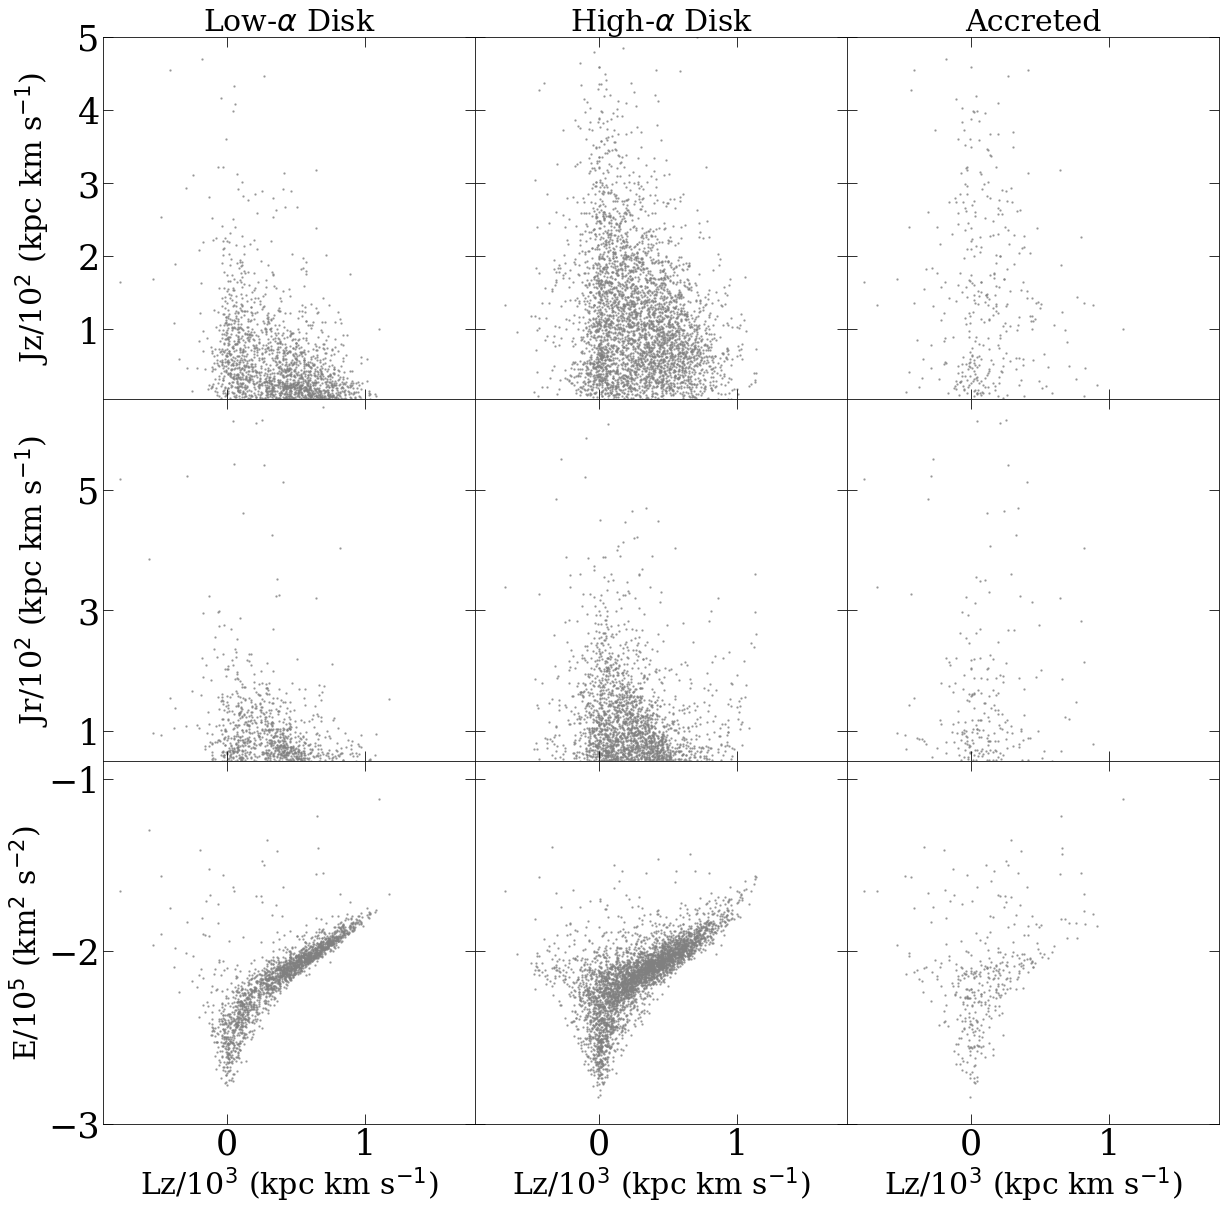

In [78]:
# Get current size
fig_size = plt.rcParams["figure.figsize"]

#Figure settings (font sizes of ticks and labels)
labs=30
tcks=35

fig= plt.figure(figsize=(20,20),constrained_layout=True)

gs = gridspec.GridSpec(3,3)
gs.update(wspace=0, hspace=0) # set the spacing between axes. 


plt.subplot(gs[0])
plt.scatter(lz[mask&(rads<4)&(mgfe<0.2)]/1e3,jz[mask&(rads<4)&(mgfe<0.2)]/1e2,c='gray',alpha=0.6,s=2)
plt.title('Low-$\\alpha$ Disk',fontsize=labs)
plt.xticks((np.arange(-4,4,step=1)),fontsize=tcks)
plt.yticks((np.arange(-1,10,step=1)),fontsize=tcks)
plt.ylabel('Jz/10$^2$ (kpc km s$^{-1}$)',size=labs,labelpad=25)
plt.xlim(-0.9,1.8)
plt.ylim(0.05,5)
plt.tick_params(direction='in',right=True,top=True,length=10,labelbottom=False)

ax = plt.subplot(gs[1])
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
ax.yaxis.set_ticks_position("both")
plt.scatter(lz[mask&(rads<4)&(mgfe>0.2)]/1e3,jz[mask&(rads<4)&(mgfe>0.2)]/1e2,c='gray',alpha=0.6,s=2)
plt.title('High-$\\alpha$ Disk',fontsize=labs)
plt.xticks((np.arange(-4,4,step=1)),fontsize=tcks)
plt.yticks((np.arange(-1,10,step=1)),fontsize=tcks)
plt.xlim(-0.9,1.8)
plt.ylim(0.05,5)
plt.tick_params(direction='in',right=True,top=True,length=10,labelbottom=False,labelright=False)

plt.subplot(gs[2])
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
ax.yaxis.set_ticks_position("both")
plt.scatter(lz[mask&(rads<4)&acc_mask]/1e3,jz[mask&(rads<4)&acc_mask]/1e2,c='gray',alpha=0.6,s=2)
plt.title('Accreted',fontsize=labs)
plt.xticks((np.arange(-4,4,step=1)),fontsize=tcks)
plt.yticks((np.arange(-1,10,step=1)),fontsize=tcks)
plt.xlim(-0.9,1.8)
plt.ylim(0.05,5)
plt.tick_params(direction='in',right=True,top=True,length=10,labelbottom=False,labelright=False,labelleft=False)


plt.subplot(gs[3])
plt.scatter(lz[mask&(rads<4)&(mgfe<0.2)]/1e3,jr[mask&(rads<4)&(mgfe<0.2)]/1e2,c='gray',alpha=0.6,s=2)
plt.xticks((np.arange(-4,4,step=1)),fontsize=tcks)
plt.yticks((np.arange(-1,10,step=2)),fontsize=tcks)
plt.ylabel('Jr/10$^2$ (kpc km s$^{-1}$)',labelpad=25,size=labs)
plt.xlim(-0.9,1.8)
plt.ylim(0.5,6.5)
#plt.arrow(1.7,5.3,-1,-2,width=0.03,head_width=0.3,head_length=0.5,length_includes_head=True,color='green')
#plt.arrow(-1,2,1.2,0,width=0.03,head_width=0.3,head_length=0.5,length_includes_head=True,color='red')
#plt.arrow(2.5,4,-0.4,-2.5,width=0.03,head_width=0.3,head_length=0.5,length_includes_head=True,color='blue')
plt.tick_params(direction='in',right=True,top=True,length=10,labelbottom=False,labelright=False)

ax = plt.subplot(gs[4])
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
ax.yaxis.set_ticks_position("both")
plt.scatter(lz[mask&(rads<4)&(mgfe>0.2)]/1e3,jr[mask&(rads<4)&(mgfe>0.2)]/1e2,c='gray',alpha=0.6,s=2)
plt.xticks((np.arange(-4,4,step=1)),fontsize=tcks)
plt.yticks((np.arange(-1,10,step=2)),fontsize=tcks)
plt.xlim(-0.9,1.8)
plt.ylim(0.5,6.5)
#plt.arrow(1.7,5.3,-1,-2,width=0.03,head_width=0.3,head_length=0.5,length_includes_head=True,color='green')
#plt.arrow(-1,2,1.2,0,width=0.03,head_width=0.3,head_length=0.5,length_includes_head=True,color='red')
#plt.arrow(2.5,4,-0.4,-2.5,width=0.03,head_width=0.3,head_length=0.5,length_includes_head=True,color='blue')
plt.tick_params(direction='in',right=True,top=True,length=10,labelbottom=False,labelright=False)

plt.subplot(gs[5])
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
ax.yaxis.set_ticks_position("both")
plt.scatter(lz[mask&(rads<4)&acc_mask]/1e3,jr[mask&(rads<4)&acc_mask]/1e2,c='gray',alpha=0.6,s=2)
plt.xticks((np.arange(-4,4,step=1)),fontsize=tcks)
plt.yticks((np.arange(-1,10,step=2)),fontsize=tcks)
plt.xlim(-0.9,1.8)
plt.ylim(0.5,6.5)
plt.tick_params(direction='in',right=True,top=True,length=10,labelbottom=False,labelright=False,labelleft=False)

plt.subplot(gs[6])
plt.scatter(lz[mask&(rads<4)&(mgfe<0.2)]/1e3,E[mask&(rads<4)&(mgfe<0.2)]/1e5,c='gray',alpha=0.6,s=2)
fig.subplots_adjust()
plt.xticks((np.arange(-10,10,step=1)),fontsize=tcks)
plt.yticks((np.arange(-50,0,step=1)),fontsize=tcks)
plt.xlabel('Lz/10$^3$ (kpc km s$^{-1}$)',size=labs)
plt.ylabel('E/10$^5$ (km$^2$ s$^{-2}$)',size=labs)
plt.xlim(-0.9,1.8)
plt.ylim(-3,-0.9)
plt.tick_params(direction='in',right=True,top=True,length=10,labelright=False)

ax = plt.subplot(gs[7])
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
ax.yaxis.set_ticks_position("both")
plt.xticks((np.arange(-10,10,step=1)),fontsize=tcks)
plt.yticks((np.arange(-50,0,step=1)),fontsize=tcks)
plt.scatter(lz[mask&(rads<4)&(mgfe>0.2)]/1e3,E[mask&(rads<4)&(mgfe>0.2)]/1e5,c='gray',alpha=0.6,s=2)
plt.xlabel('Lz/10$^3$ (kpc km s$^{-1}$)',size=labs)
plt.xlim(-0.9,1.8)
plt.ylim(-3,-0.9)
plt.tick_params(direction='in',right=True,top=True,length=10,labelright=False)

ax = plt.subplot(gs[8])
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
ax.yaxis.set_ticks_position("both")
plt.xticks((np.arange(-10,10,step=1)),fontsize=tcks)
plt.yticks((np.arange(-50,0,step=1)),fontsize=tcks)
color = plt.scatter(lz[mask&(rads<4)&acc_mask]/1e3,E[mask&(rads<4)&acc_mask]/1e5,c='gray',alpha=0.6,s=2)
plt.xlabel('Lz/10$^3$ (kpc km s$^{-1}$)',size=labs)
plt.xlim(-0.9,1.8)
plt.ylim(-3,-0.9)
plt.tick_params(direction='in',right=True,top=True,length=10,labelright=False,labelleft=False)


# Fig 7

(0, 2.85)

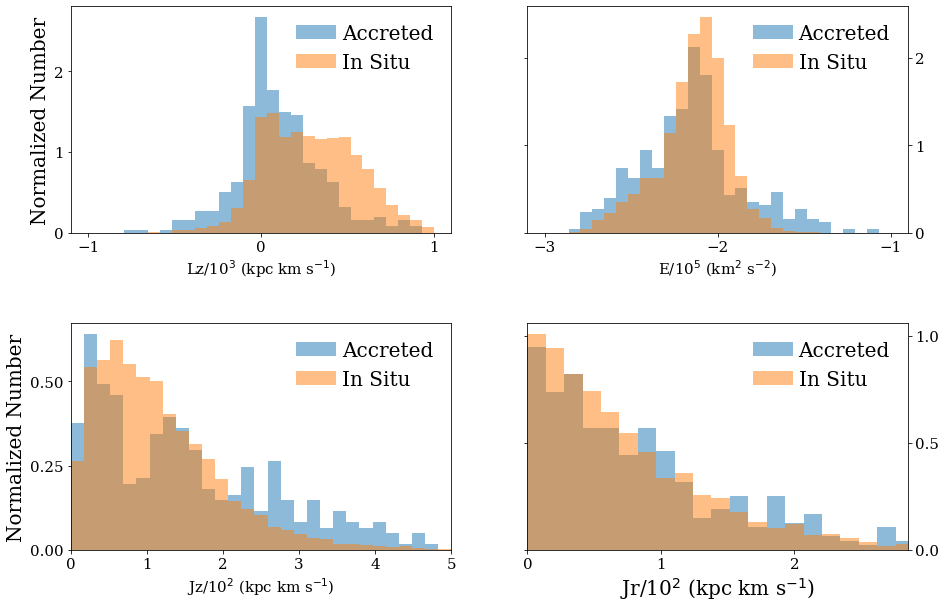

In [79]:
# Get current size
fig_size = plt.rcParams["figure.figsize"]

fig_size[0] = 15
fig_size[1] = 10

#Figure settings (font sizes of ticks and labels)
labs=15
tcks=15

gs = gridspec.GridSpec(2,2)
gs.update(wspace=0.2, hspace=0.4) # set the spacing between axes. 

plt.subplot(gs[0])
bins = np.linspace(-1,1,30)
plt.hist(lz[mask&acc_mask&(rads<4)]/1e3, bins, alpha=0.5, density=True, label='Accreted')
plt.hist(lz[mask&~acc_mask&(rads<4)&(mgfe>0.2)]/1e3, bins, alpha=0.5, density=True, label='In Situ')
plt.xlabel('Lz/10$^3$ (kpc km s$^{-1}$)',size=labs)
plt.ylabel('Normalized Number',size=20)
plt.legend(frameon=False,fontsize=20,handletextpad=0.3,loc='upper right')
plt.xticks(fontsize=tcks)
plt.yticks(fontsize=tcks)

ax = plt.subplot(gs[1])
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
ax.yaxis.set_ticks_position("both")
bins = np.linspace(-3,-1,30)
plt.hist(E[mask&acc_mask&(rads<4)]/1e5, bins, alpha=0.5, density=True, label='Accreted')
plt.hist(E[mask&~acc_mask&(rads<4)&(mgfe>0.2)]/1e5, bins, alpha=0.5, density=True, label='In Situ')
plt.xlabel('E/10$^5$ (km$^2$ s$^{-2}$)',size=labs)
#plt.ylabel('Normalized Number',size=labs)
plt.legend(frameon=False,fontsize=20,handletextpad=0.3,loc='upper right')
plt.xticks(fontsize=tcks)
plt.yticks(fontsize=tcks)

plt.subplot(gs[2])
bins = np.linspace(0,5,30)
plt.hist(jz[mask&acc_mask&(rads<4)]/1e2, bins, alpha=0.5, density=True, label='Accreted')
plt.hist(jz[mask&~acc_mask&(rads<4)&(mgfe>0.2)]/1e2, bins, alpha=0.5, density=True, label='In Situ')
plt.xlabel('Jz/10$^2$ (kpc km s$^{-1}$)',size=labs)
plt.ylabel('Normalized Number',size=20)
plt.legend(frameon=False,fontsize=20,handletextpad=0.3,loc='upper right')
plt.xticks((np.arange(0,6,step=1)),fontsize=tcks)
plt.yticks(fontsize=tcks)
plt.xlim(0,5)

ax = plt.subplot(gs[3])
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
ax.yaxis.set_ticks_position("both")
bins = np.linspace(0,4,30)
plt.hist(jr[mask&acc_mask&(rads<4)]/1e2, bins, alpha=0.5, density=True, label='Accreted')
plt.hist(jr[mask&~acc_mask&(rads<4)&(mgfe>0.2)]/1e2, bins, alpha=0.5, density=True, label='In Situ')
plt.xlabel('Jr/10$^2$ (kpc km s$^{-1}$)',size=20)
#plt.ylabel('Normalized Number',size=labs)
plt.legend(frameon=False,fontsize=20,handletextpad=0.3,loc='upper right')
plt.xticks(np.arange(0,6,step=1),fontsize=tcks)
plt.yticks(fontsize=tcks)
plt.xlim(0,2.85)


# Fig 8

/Users/qpasa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


(-2.9, -0.4)

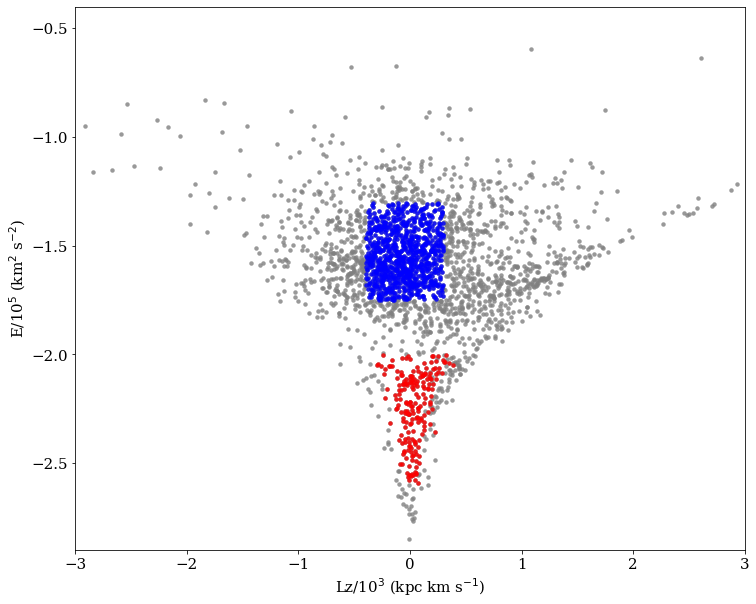

In [80]:
mask_le = ( (ecc[mask&acc_mask] > 0.6) &  (E[mask&acc_mask] < -200000) & (E[mask&acc_mask] > -260000)  ) 
mask_ge = ( (lz[mask&acc_mask] > -400) & (lz[mask&acc_mask] < 300) & (E[mask&acc_mask] > -175000) & (E[mask&acc_mask] < -130000)  )

plt.figure(figsize=(12,10))
plt.scatter(lz[mask&acc_mask]/1e3,E[mask&acc_mask]/1e5,c='gray',alpha=0.8,s=20,lw=0)
plt.scatter(lz[mask&acc_mask][mask_le]/1e3,E[mask&acc_mask][mask_le]/1e5,c='red',alpha=0.8,s=20,lw=0)
plt.scatter(lz[mask&acc_mask][mask_ge]/1e3,E[mask&acc_mask][mask_ge]/1e5,c='blue',alpha=0.8,s=20,lw=0)
plt.xlabel('Lz/10$^3$ (kpc km s$^{-1}$)',size=labs)
plt.ylabel('E/10$^5$ (km$^2$ s$^{-2}$)',size=labs)
#Figure settings (labels, log scale, limits, legend position)    
plt.xticks((np.arange(-5,5,step=1.0)),fontsize=tcks)
plt.yticks((np.arange(-4,1,step=0.5)),fontsize=tcks)
#plt.legend(loc='lower right',frameon=False)
plt.xlim(-3,3)
plt.ylim(-2.9,-0.4)

# #Save GE/S star IDs to a fits file
# #Instructionc collected from https://docs.astropy.org/en/stable/io/fits/#creating-a-new-fits-file
# col1 = fits.Column(name='APOGEE ID', array=[mask&acc_mask], format='30A')
# cols = fits.ColDefs([col1])
# hdu = fits.BinTableHDU.from_columns(cols)
# #hdu.writeto('GES_IDs.fits')



# Fig 9

/Users/qpasa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.


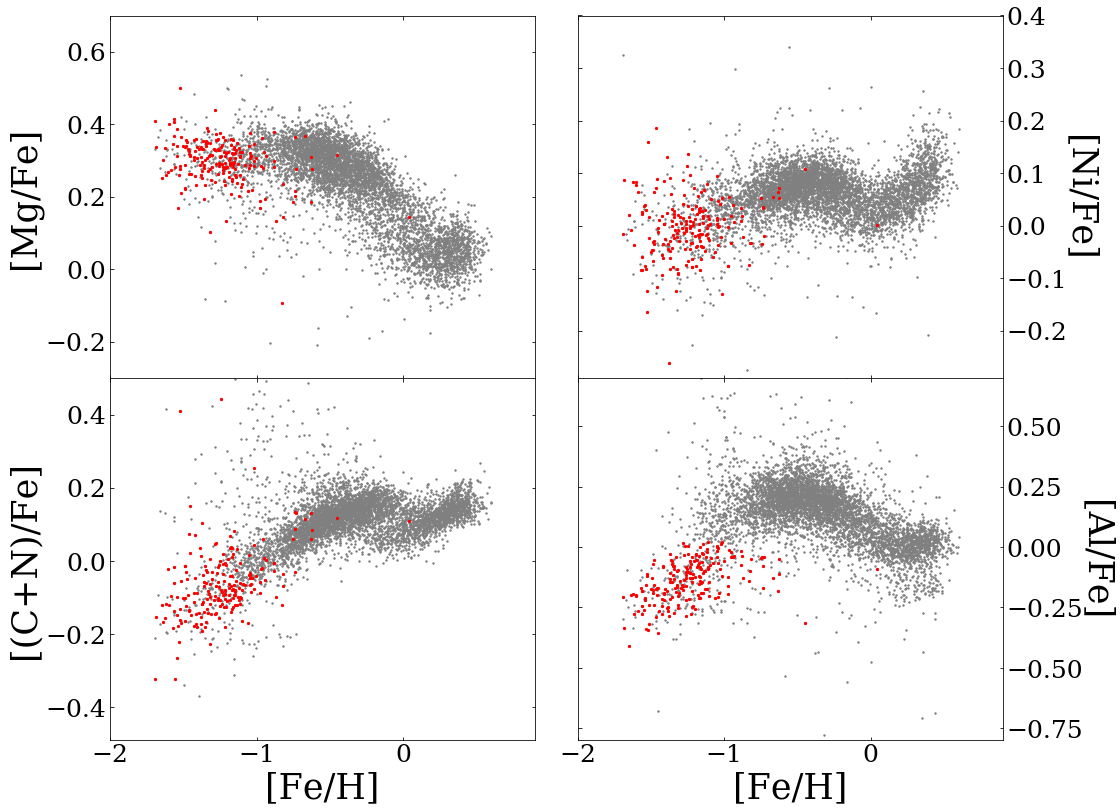

In [81]:
xup = 0.9
xlo = -2

cnfe = np.log10(10**(cfe+fehs+8.39) + 10**(nfe+fehs+7.78)) - np.log10(10.**8.39 + 10.**7.78) - fehs

plt.figure(figsize=(16,20))
plt.rc('font',family='serif',size=35)
plt.subplot(321)
plt.scatter(fehs[mask&(rads<4)],mgfe[mask&(rads<4)],s=2,c='gray',rasterized=True)
plt.scatter(fehs[mask&acc_mask][mask_le],mgfe[mask&acc_mask][mask_le],s=5,c='r',rasterized=True)
plt.tick_params(labelsize=25,direction='in',axis='both',left=True, right=True,top=True,labelbottom=False)
plt.ylim(-0.3,0.7)
plt.xlim(xlo,xup)
plt.ylabel('[Mg/Fe]')

ax = plt.subplot(322)
ax.scatter(fehs[mask&(rads<4)],nife[mask&(rads<4)],s=2,c='gray',rasterized=True)
ax.scatter(fehs[mask&acc_mask][mask_le],nife[mask&acc_mask][mask_le],s=5,c='r',rasterized=True)
ax.tick_params(labelsize=25,direction='in',axis='both',left=True, right=True,top=True,labelbottom=False)
ax.set_ylabel('[Ni/Fe]',rotation=270,labelpad=30)
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
ax.yaxis.set_ticks_position('both')
ax.set_ylim(-0.29,0.4)
ax.set_xlim(xlo,xup)
 
plt.subplot(323)
plt.scatter(fehs[mask&(rads<4)],cnfe[mask&(rads<4)],s=2,c='gray',rasterized=True)
plt.scatter(fehs[mask&acc_mask][mask_le],cnfe[mask&acc_mask][mask_le],s=5,c='r',rasterized=True)
plt.tick_params(labelsize=25,direction='in',axis='both',left=True, right=True,top=True)
plt.ylabel('[(C+N)/Fe]')
plt.xlabel('[Fe/H]')
plt.ylim(-0.49,0.5)
plt.xlim(xlo,xup)
 
ax = plt.subplot(324)
ax.scatter(fehs[mask&(rads<4)],alfe[mask&(rads<4)],s=2,c='gray',rasterized=True)
ax.scatter(fehs[mask&acc_mask][mask_le],alfe[mask&acc_mask][mask_le],s=5,c='r',rasterized=True)
plt.tick_params(labelsize=25,direction='in',axis='both',left=True, right=True,top=True)
ax.set_ylabel('[Al/Fe]',rotation=270,labelpad=30)
ax.set_xlabel('[Fe/H]')
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
ax.yaxis.set_ticks_position('both')
ax.set_ylim(-0.8,0.7)
ax.set_xlim(xlo,xup)
 
plt.subplots_adjust(hspace=0,wspace=0.1)


# Fig 10

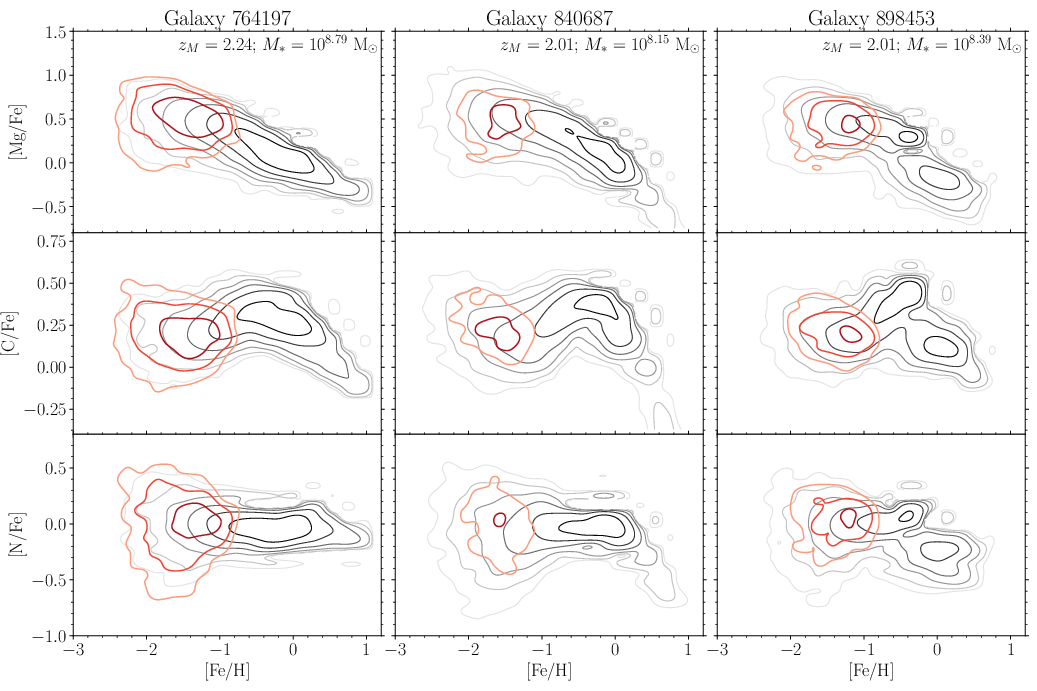

In [116]:
from wand.image import Image as WImage
img = WImage(filename='/Users/qpasa/Desktop/figure7.pdf')
img

# Fig 11

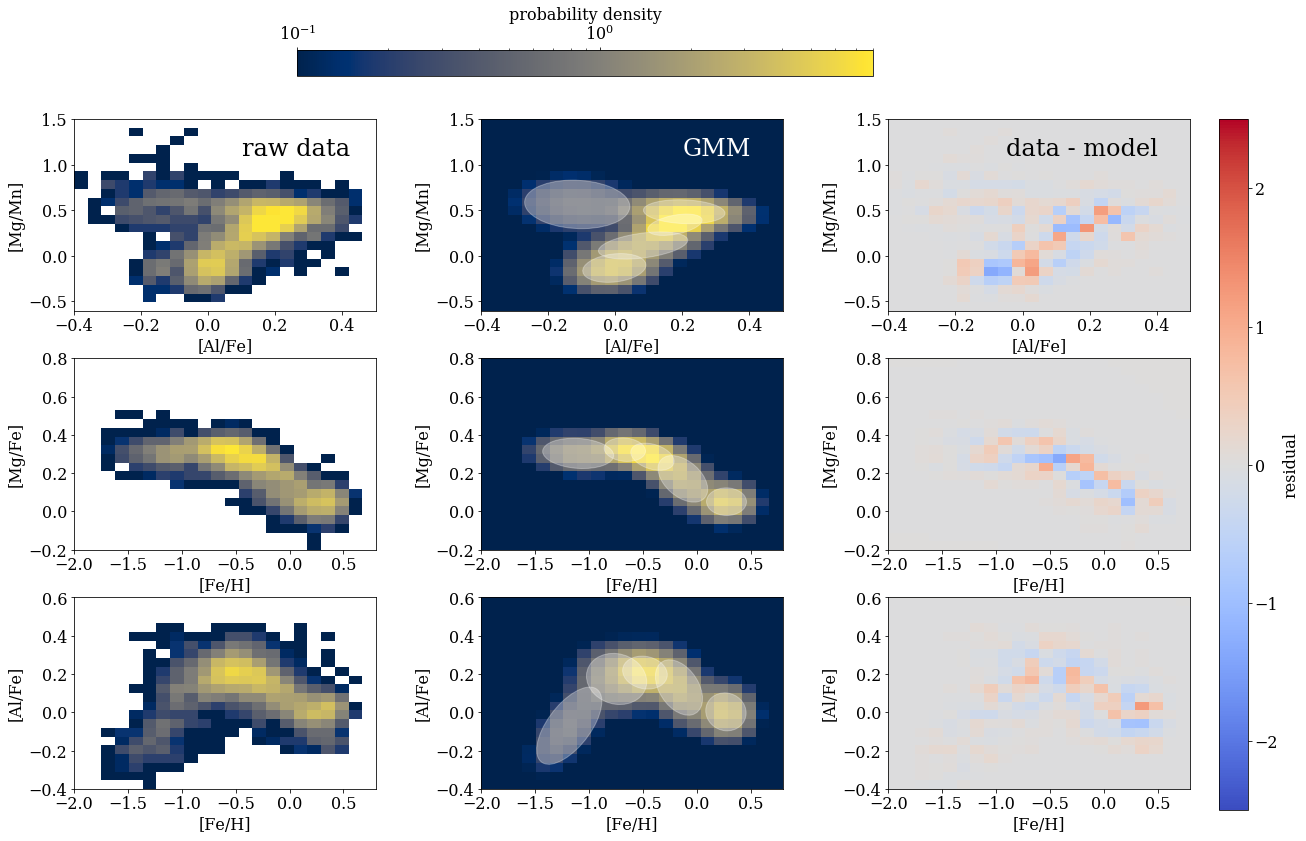

In [109]:


from sklearn.mixture import GaussianMixture as skl_GMM
import matplotlib

# MG/MN
# params = {'axes.labelsize': 14, 'xtick.labelsize': 14, 'ytick.labelsize': 14, 'text.usetex': True, 'lines.linewidth': 1,
#          'axes.titlesize': 12, 'font.family': 'serif'}
#number of components
N_comp = 5
# get rid of aluminium poor metal rich, metal poor magnesium poor, or aluminium = -9999
mask_gmm = ((fehs[mask&(rads<4)]>-0.8)&(alfe[mask&(rads<4)]<-0.2))|((fehs[mask&(rads<4)]<-0.5)&(mgfe[mask&(rads<4)]<0.15))|((alfe[mask&(rads<4)]<-10))|((alfe[mask&(rads<4)]>0.45))

#initialise and fit GMM
gmm = skl_GMM(n_components=N_comp, covariance_type='full')
gmm.fit(np.dstack([alfe[mask&(rads<4)][~mask_gmm],mgmn[mask&(rads<4)][~mask_gmm]])[0])
#prepare Fe/H and Al/Fe bins
alfemin, alfemax = -0.4, 0.5
mgmnmin, mgmnmax = -0.6,1.5
x = np.linspace(alfemin, alfemax,23)
y = np.linspace(mgmnmin, mgmnmax,23)
dx, dy = x[1]-x[0], y[1]-y[0]
#generate histogram at these bins
hist, xedges,yedges = np.histogram2d(alfe[mask&(rads<4)][~mask_gmm],mgmn[mask&(rads<4)][~mask_gmm], bins=[x,y])
histnorm = np.sum(hist)*dx*dy
hist = hist/histnorm
poisson = np.sqrt(hist)
histnorm = np.sum(hist)*dx*dy
#find bin centers
xc = (x[1:]+x[:-1])/2.
yc = (y[1:]+y[:-1])/2.
#make a grid at the bin centers
X, Y = np.meshgrid(xc, yc)
XX = np.array([X.ravel(), Y.ravel()]).T
#estimate the gmm density at the bin centers
Z = gmm.score_samples(XX)
Z = Z.reshape(X.shape)
datanorm = np.sum(hist)
modelnorm = np.sum(np.exp(Z))*dx*dy
hist = hist#/datanorm
Z = np.exp(Z)/modelnorm

# MG/FE
#number of components
N_comp = 5
#initialise and fit GMM
gmm2 = skl_GMM(n_components=N_comp, covariance_type='full')
gmm2.fit(np.dstack([fehs[mask&(rads<4)][~mask_gmm],mgfe[mask&(rads<4)][~mask_gmm]])[0])
#prepare Fe/H and Al/Fe bins
alfemin2, alfemax2 = -2., 0.8
mgmnmin2, mgmnmax2 = -0.2, 0.8
x2 = np.linspace(alfemin2, alfemax2,23)
y2 = np.linspace(mgmnmin2, mgmnmax2,23)
dx2, dy2 = x2[1]-x2[0], y2[1]-y2[0]
#generate histogram at these bins
hist2, xedges2,yedges2 = np.histogram2d(fehs[mask&(rads<4)][~mask_gmm],mgfe[mask&(rads<4)][~mask_gmm], bins=[x2,y2])
histnorm2 = np.sum(hist2)*dx2*dy2
hist2 = hist2/histnorm2
poisson2 = np.sqrt(hist2)
histnorm2 = np.sum(hist2)*dx2*dy2
#find bin centers
xc2 = (x2[1:]+x2[:-1])/2.
yc2 = (y2[1:]+y2[:-1])/2.
#make a grid at the bin centers
X2, Y2 = np.meshgrid(xc2, yc2)
XX2 = np.array([X2.ravel(), Y2.ravel()]).T
#estimate the gmm density at the bin centers
Z2 = gmm2.score_samples(XX2)
Z2 = Z2.reshape(X2.shape)
datanorm2 = np.sum(hist2)
modelnorm2 = np.sum(np.exp(Z2))*dx2*dy2
hist2 = hist2#/datanorm
Z2 = np.exp(Z2)/modelnorm2

# AL/FE
#number of components
N_comp = 5
#initialise and fit GMM
gmm3 = skl_GMM(n_components=N_comp, covariance_type='full')
gmm3.fit(np.dstack([fehs[mask&(rads<4)][~mask_gmm],alfe[mask&(rads<4)][~mask_gmm]])[0])
# gmm3.fit(np.dstack([fehs[mask&(rads<4)][(alfe[mask&(rads<4)]<0.5)&(alfe[mask&(rads<4)]>-10)&~mask3],alfe[mask&(rads<4)][(alfe[mask&(rads<4)]<0.5)&(alfe[mask&(rads<4)]>-10)&~mask3]])[0])
#prepare Fe/H and Al/Fe bins
alfemin3, alfemax3 = -2., 0.8
mgmnmin3, mgmnmax3 = -0.4, 0.6
x3 = np.linspace(alfemin3, alfemax3,23)
y3 = np.linspace(mgmnmin3, mgmnmax3,23)
dx3, dy3 = x3[1]-x3[0], y3[1]-y3[0]
#generate histogram at these bins
# hist3, xedges3,yedges3 = np.histogram2d(fehs[mask&(rads<4)][(alfe[mask&(rads<4)]<0.5)&(alfe[mask&(rads<4)]>-10)&~mask3],alfe[mask&(rads<4)][(alfe[mask&(rads<4)]<0.5)&(alfe[mask&(rads<4)]>-10)&~mask3], bins=[x3,y3])
hist3, xedges3,yedges3 = np.histogram2d(fehs[mask&(rads<4)][~mask_gmm],alfe[mask&(rads<4)][~mask_gmm], bins=[x3,y3])
histnorm3 = np.sum(hist3)*dx3*dy3
hist3 = hist3/histnorm3
poisson3 = np.sqrt(hist3)
histnorm3 = np.sum(hist3)*dx3*dy3
#find bin centers
xc3 = (x3[1:]+x3[:-1])/2.
yc3 = (y3[1:]+y3[:-1])/2.
#make a grid at the bin centers
X3, Y3 = np.meshgrid(xc3, yc3)
XX3 = np.array([X3.ravel(), Y3.ravel()]).T
#estimate the gmm density at the bin centers
Z3 = gmm3.score_samples(XX3)
Z3 = Z3.reshape(X3.shape)
datanorm3 = np.sum(hist3)
modelnorm3 = np.sum(np.exp(Z3))*dx3*dy3
hist3 = hist3#/datanorm
Z3 = np.exp(Z3)/modelnorm3

#now make the plot
fig, ax = plt.subplots(3,3, sharex=False, sharey=False)
fig.set_size_inches(20,12)

# Mg/Mn
cb2 = ax[0,0].imshow(np.rot90(hist),extent=[alfemin,alfemax,mgmnmin,mgmnmax],aspect='auto',norm=matplotlib.colors.LogNorm(vmin=0.1,vmax=8.),cmap=plt.cm.cividis)
cb3 = ax[0,1].imshow(Z[::-1],extent=[alfemin,alfemax,mgmnmin,mgmnmax],aspect='auto',norm=matplotlib.colors.LogNorm(vmin=0.1,vmax=8.),cmap=plt.cm.cividis)
residual = np.rot90(hist)-Z[::-1]
cb = ax[0,2].imshow(residual,extent=[alfemin,alfemax,mgmnmin,mgmnmax],aspect='auto',cmap=plt.cm.coolwarm,vmin=-2.5,vmax=2.5)
# Mg/fe
cb4 = ax[1,0].imshow(np.rot90(hist2),extent=[alfemin2,alfemax2,mgmnmin2,mgmnmax2],aspect='auto',norm=matplotlib.colors.LogNorm(vmin=0.1,vmax=8.),cmap=plt.cm.cividis)
cb5 = ax[1,1].imshow(Z2[::-1],extent=[alfemin2,alfemax2,mgmnmin2,mgmnmax2],aspect='auto',norm=matplotlib.colors.LogNorm(vmin=0.1,vmax=8.),cmap=plt.cm.cividis)
residual2 = np.rot90(hist2)-Z2[::-1]
c6 = ax[1,2].imshow(residual2,extent=[alfemin2,alfemax2,mgmnmin2,mgmnmax2],aspect='auto',cmap=plt.cm.coolwarm,vmin=-2.5,vmax=2.5)
# Al/Fe
cb7 = ax[2,0].imshow(np.rot90(hist3),extent=[alfemin3,alfemax3,mgmnmin3,mgmnmax3],aspect='auto',norm=matplotlib.colors.LogNorm(vmin=0.1,vmax=8.),cmap=plt.cm.cividis)
cb8 = ax[2,1].imshow(Z3[::-1],extent=[alfemin3,alfemax3,mgmnmin3,mgmnmax3],aspect='auto',norm=matplotlib.colors.LogNorm(vmin=0.1,vmax=8.),cmap=plt.cm.cividis)
residual3 = np.rot90(hist3)-Z3[::-1]
cb9 = ax[2,2].imshow(residual3,extent=[alfemin3,alfemax3,mgmnmin3,mgmnmax3],aspect='auto',cmap=plt.cm.coolwarm,vmin=-2.5,vmax=2.5)
# /np.rot90(poisson3)

#move the panels to the left and down to make space for color bars
plt.subplots_adjust(right=0.9, wspace=0.1, top=0.9)
#label the panels
ax[0,0].text(0.1,1.1,r'raw data', color='k',fontsize=24)
ax[0,1].text(0.2,1.1,r'GMM', color='White',fontsize=24)
ax[0,2].text(-0.05,1.1,r'data - model',fontsize=24)

#plot colorbars
cax = fig.add_axes([0.92,0.1,0.02,0.8])
cax2 = fig.add_axes([0.28,0.95,0.4,0.03])
plt.colorbar(cb, cax=cax, label=r'residual')
plt.colorbar(cb2, cax=cax2, label=r'probability density', orientation='horizontal')
cax2.xaxis.set_ticks_position('top')
cax2.xaxis.set_label_position('top')
#x and y axis labels
ax[0,0].set_ylabel(r'[Mg/Mn]')
ax[1,0].set_ylabel(r'[Mg/Fe]')
ax[2,0].set_ylabel(r'[Al/Fe]')
ax[0,0].set_xlabel(r'[Al/Fe]')
ax[1,0].set_xlabel(r'[Fe/H]')
ax[2,0].set_xlabel(r'[Fe/H]')

ax[0,1].set_ylabel(r'[Mg/Mn]')
ax[1,1].set_ylabel(r'[Mg/Fe]')
ax[2,1].set_ylabel(r'[Al/Fe]')
ax[0,1].set_xlabel(r'[Al/Fe]')
ax[1,1].set_xlabel(r'[Fe/H]')
ax[2,1].set_xlabel(r'[Fe/H]')

ax[0,2].set_ylabel(r'[Mg/Mn]')
ax[1,2].set_ylabel(r'[Mg/Fe]')
ax[2,2].set_ylabel(r'[Al/Fe]')
ax[0,2].set_xlabel(r'[Al/Fe]')
ax[1,2].set_xlabel(r'[Fe/H]')
ax[2,2].set_xlabel(r'[Fe/H]')

#plot the ellipses Mg/Mn vs Al/Fe
for i, (mean, cov) in enumerate(zip(gmm.means_, gmm.covariances_)):
    v, w = np.linalg.eigh(cov)
    # Plot an ellipse to show the Gaussian component
    angle = np.arctan2(w[0][1], w[0][0])
    angle = 180. * angle / np.pi  # convert to degrees
    v = 2. * np.sqrt(2.) * np.sqrt(v)
    ell = matplotlib.patches.Ellipse(mean, v[0], v[1], 180. + angle, color='White', alpha=0.3)
    #ell.set_clip_box(ax[0].bbox)
    #ell.set_alpha(.5)
    ax[0,1].add_artist(ell)

#plot the ellipses Mg/Fe vs Fe/H
for i, (mean, cov) in enumerate(zip(gmm2.means_, gmm2.covariances_)):
    v, w = np.linalg.eigh(cov)
    # Plot an ellipse to show the Gaussian component
    angle = np.arctan2(w[0][1], w[0][0])
    angle = 180. * angle / np.pi  # convert to degrees
    v = 2. * np.sqrt(2.) * np.sqrt(v)
    ell = matplotlib.patches.Ellipse(mean, v[0], v[1], 180. + angle, color='White', alpha=0.3)
    #ell.set_clip_box(ax[0].bbox)
    #ell.set_alpha(.5)
    ax[1,1].add_artist(ell)

#plot the ellipses Al/Fe vs Fe/H
for i, (mean, cov) in enumerate(zip(gmm3.means_, gmm3.covariances_)):
    v, w = np.linalg.eigh(cov)
    # Plot an ellipse to show the Gaussian component
    angle = np.arctan2(w[0][1], w[0][0])
    angle = 180. * angle / np.pi  # convert to degrees
    v = 2. * np.sqrt(2.) * np.sqrt(v)
    ell = matplotlib.patches.Ellipse(mean, v[0], v[1], 180. + angle, color='white', alpha=0.3)
    #ell.set_clip_box(ax[0].bbox)
    #ell.set_alpha(.5)
    ax[2,1].add_artist(ell)

plt.subplots_adjust(hspace=0.25,wspace=0.35)

# plt.savefig('/Users/danny/Desktop/IGS-structure/ig-structure/plots/figure8.pdf', format='pdf', dpi=400, bbox_inches='tight')


# Fig 12

(-2.9, -0.4)

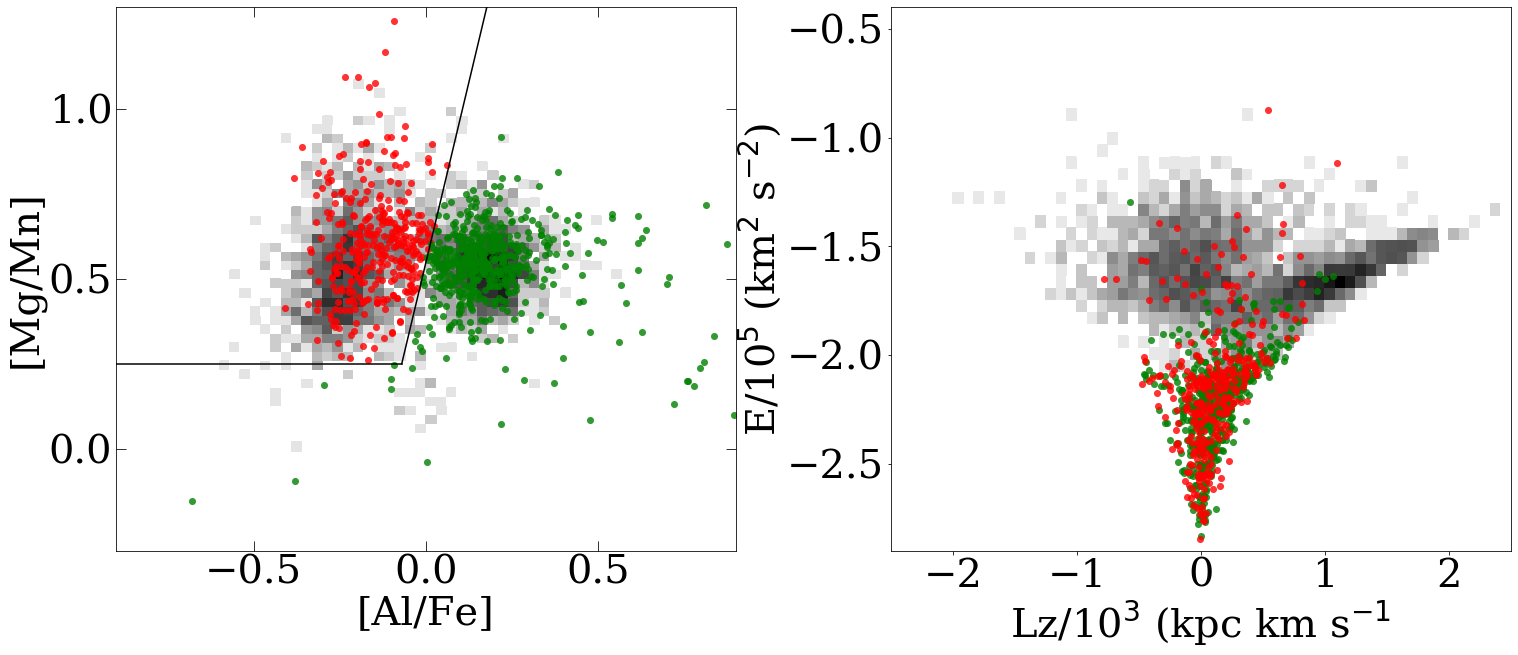

In [84]:
#Get current size
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 25 
fig_size[1] = 10

#Figure settings (font sizes of ticks and labels) 
labs=40 
tcks=40

gs = gridspec.GridSpec(1,2) 
gs.update(wspace=0.25, hspace=0) # set the spacing between axes.

plt.subplot(gs[0])
plt.hist2d(alfe[mask&(rads>4)&(fehs<-0.8)], mgmn[mask&(rads>4)&(fehs<-0.8)], norm=LogNorm(), bins=(60,60),range=[[-0.9,0.9],[-0.3,1.3]], cmap='Greys')
plt.xlabel('[Al/Fe]',size=labs) 
plt.scatter(alfe[mask&(rads<4)&(fehs<-0.8)&acc_mask], mgmn[mask&(rads<4)&(fehs<-0.8)&acc_mask], c='red', alpha=0.8,s=50,lw=0) 
plt.scatter(alfe[mask&(rads<4)&(fehs<-0.8)&~acc_mask], mgmn[mask&(rads<4)&(fehs<-0.8)&~acc_mask], c='green', alpha=0.8,s=50,lw=0) 
plt.ylabel('[Mg/Mn]',size=labs) 
plt.tick_params(direction='in',right=True,top=True,length=10) 
plt.xticks((np.arange(-3.0,1.5,step=0.5)),fontsize=tcks) 
plt.yticks((np.arange(-1.5,1.5,step=0.5)),fontsize=tcks) 
plt.tick_params(which='minor',direction='in',right=True,top=True,length=2) 
plt.xlim(-0.9,0.9) 
plt.ylim(-0.3,1.3)

plt.plot([-1,-0.07],[0.25,0.25], 'k', c='black') 
x = np.arange(-0.07,0.4,0.01) 
plt.plot(x,4.25*x+0.5475, 'k', c='black')


plt.subplot(gs[1]) 
plt.hist2d(lz[mask&(rads>4)&(fehs<-0.8)]/1e3,E[mask&(rads>4)&(fehs<-0.8)]/1e5, norm=LogNorm(), bins=(60,60),range=[[-2.5,2.5],[-2.9,0.4]], cmap='Greys')
plt.scatter(lz[mask&(rads<4)&(fehs<-0.8)&~acc_mask]/1e3,E[mask&(rads<4)&(fehs<-0.8)&~acc_mask]/1e5,c='green',alpha=0.8,s=50,lw=0) 
plt.scatter(lz[mask&(rads<4)&(fehs<-0.8)&acc_mask]/1e3,E[mask&(rads<4)&(fehs<-0.8)&acc_mask]/1e5,c='red',alpha=0.8,s=50,lw=0) 
plt.xlabel('Lz/10$^3$ (kpc km s$^{-1}$',size=labs) 
plt.ylabel('E/10$^5$ (km$^2$ s$^{-2}$)',size=labs)
plt.xticks((np.arange(-5,5,step=1.0)),fontsize=tcks) 
plt.yticks((np.arange(-4,1,step=0.5)),fontsize=tcks)
plt.xlim(-2.5,2.5) 
plt.ylim(-2.9,-0.4)

# Fig 13

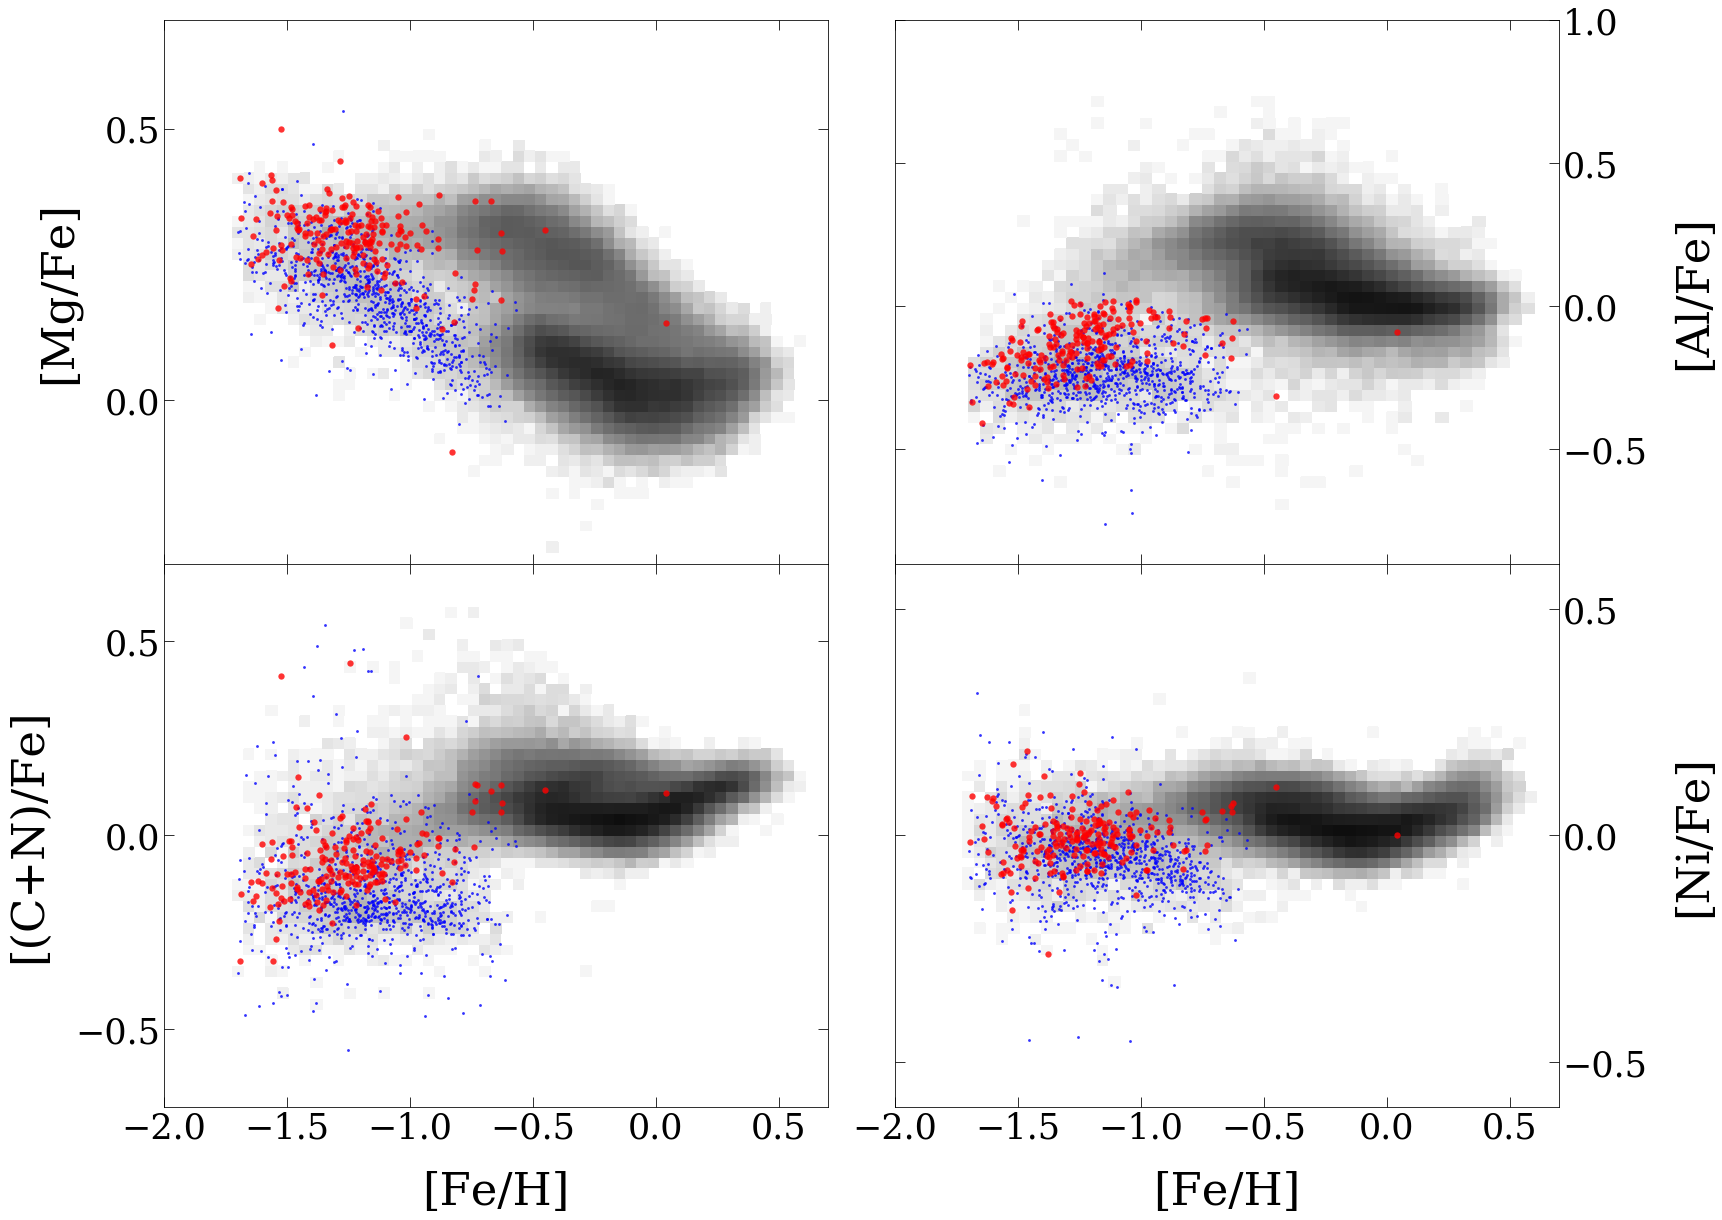

In [92]:
#GE/S and IG in abundance space
import matplotlib as mpl

#Figure settings (font sizes of ticks and labels)
labs=45
tcks=35

cmax = 4000

fig= plt.figure(figsize=(25,20),constrained_layout=True)

gs = gridspec.GridSpec(2,2)
gs.update(wspace=0.1, hspace=0) # set the spacing between axes. 

plt.subplot(gs[0])
plt.hist2d(fehs[mask], mgfe[mask], norm=LogNorm(), bins=(70, 50),range=[[-2.5,0.7],[-0.3,0.7]], cmap='Greys')
plt.clim(1,cmax)
plt.scatter(fehs[mask&acc_mask][mask_ge], mgfe[mask&acc_mask][mask_ge], c='blue', alpha=0.8,s=8,lw=0)
plt.scatter(fehs[mask&acc_mask][mask_le], mgfe[mask&acc_mask][mask_le], c='red', alpha=0.8,s=40,lw=0)
plt.xticks((np.arange(-3.0,1.5,step=0.5)),fontsize=tcks)
plt.yticks((np.arange(-1.5,1.5,step=0.5)),fontsize=tcks)
plt.ylabel('[Mg/Fe]',size=labs,labelpad=25)
plt.tick_params(direction='in',right=True,top=True,length=10,labelbottom=False)
plt.xlim(-2,0.7)
plt.ylim(-0.3,0.7)

ax = plt.subplot(gs[1])
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
ax.yaxis.set_ticks_position("both")
plt.hist2d(fehs[mask], alfe[mask], norm=LogNorm(), bins=(70, 50),range=[[-2.5,1],[-0.9,1]], cmap='Greys')
plt.clim(1,cmax)
plt.scatter(fehs[mask&acc_mask][mask_ge], alfe[mask&acc_mask][mask_ge], c='blue', alpha=0.8,s=8,lw=0)
plt.scatter(fehs[mask&acc_mask][mask_le], alfe[mask&acc_mask][mask_le], c='red', alpha=0.8,s=40,lw=0)
plt.xticks((np.arange(-3.0,1.5,step=0.5)),fontsize=tcks)
plt.yticks((np.arange(-1.5,1.5,step=0.5)),fontsize=tcks)
plt.ylabel('[Al/Fe]',size=labs,labelpad=25)
plt.xlim(-2,0.7)
plt.ylim(-0.9,1)
plt.tick_params(direction='in',right=True,top=True,length=10,labelbottom=False,labelright=True)

plt.subplot(gs[2])
plt.hist2d(fehs[mask], cnfe[mask], norm=LogNorm(), bins=(70, 50),range=[[-2.5,0.7],[-0.7,0.7]], cmap='Greys')
plt.clim(1,cmax)
plt.scatter(fehs[mask&acc_mask][mask_ge], cnfe[mask&acc_mask][mask_ge], c='blue', alpha=0.8,s=8,lw=0)
plt.scatter(fehs[mask&acc_mask][mask_le], cnfe[mask&acc_mask][mask_le], c='red', alpha=0.8,s=40,lw=0)
plt.xticks((np.arange(-3.0,1.5,step=0.5)),fontsize=tcks)
plt.yticks((np.arange(-1.5,1.5,step=0.5)),fontsize=tcks)
plt.ylabel('[(C+N)/Fe]',size=labs,labelpad=25)
plt.xlabel('[Fe/H]',size=labs,labelpad=25)
plt.tick_params(direction='in',right=True,top=True,length=10,labelbottom=True)
plt.xlim(-2,0.7)
plt.ylim(-0.7,0.7)


ax = plt.subplot(gs[3])
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
ax.yaxis.set_ticks_position("both")
plt.hist2d(fehs[mask], nife[mask], norm=LogNorm(), bins=(70, 50),range=[[-2.5,0.7],[-0.6,0.6]], cmap='Greys')
plt.clim(1,cmax)
plt.scatter(fehs[mask&acc_mask][mask_ge], nife[mask&acc_mask][mask_ge], c='blue', alpha=0.8,s=8,lw=0)
plt.scatter(fehs[mask&acc_mask][mask_le], nife[mask&acc_mask][mask_le], c='red', alpha=0.8,s=40,lw=0)
plt.xticks((np.arange(-3.0,1.5,step=0.5)),fontsize=tcks)
plt.yticks((np.arange(-1.5,1.5,step=0.5)),fontsize=tcks)
plt.ylabel('[Ni/Fe]',size=labs,labelpad=25)
plt.xlabel('[Fe/H]',size=labs,labelpad=25)
plt.xlim(-2,0.7)
plt.ylim(-0.6,0.6)
plt.tick_params(direction='in',right=True,top=True,length=10,labelbottom=True,labelright=True)

# plt.savefig('fig13.png',format='png',bbox_inches='tight')



# Fig A1

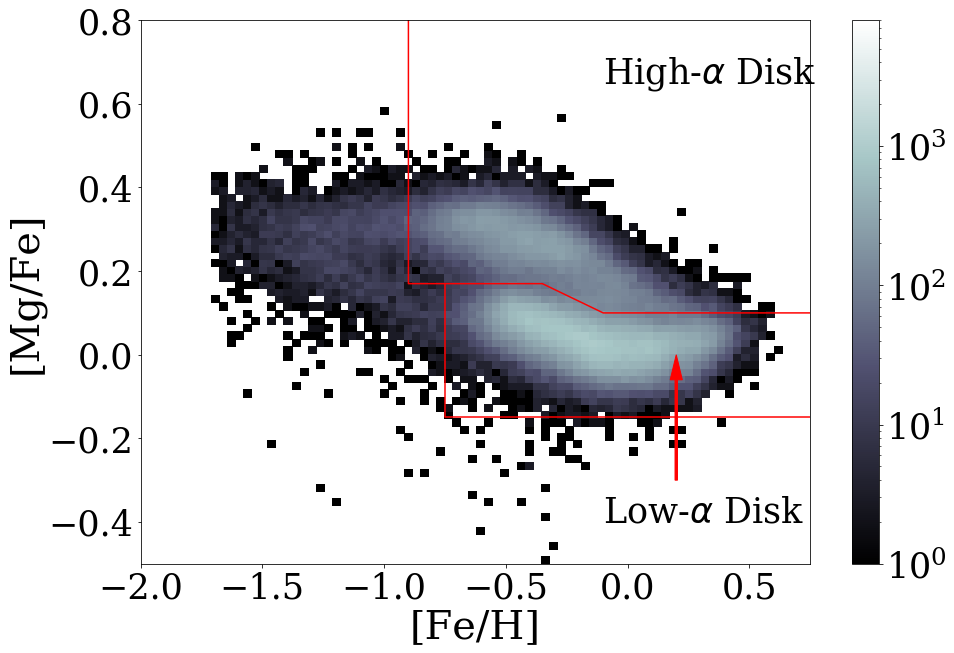

In [86]:
# Get current size
fig_size = plt.rcParams["figure.figsize"]

fig_size[0] = 15
fig_size[1] = 10

labs = 40
tcks = 35

plt.hist2d(fehs[mask],mgfe[mask],norm=LogNorm(), bins=(100, 75),range=[[-2.5,0.8],[-0.5,.8]], cmap='bone')
#Figure settings (labels, log scale, limits, legend position)   
plt.clim(1,8000)
cb= plt.colorbar()
cb.ax.tick_params(labelsize=tcks)
plt.xlabel('[Fe/H]',size=labs)
plt.ylabel('[Mg/Fe]',size=labs)
plt.xticks(fontsize=tcks)
plt.yticks(fontsize=tcks)
plt.xlim(-2.0,0.75)
plt.ylim(-0.5,0.8)
plt.text(-0.1,-0.4,'Low-$\\alpha$ Disk',fontsize=35)
plt.text(-0.1,0.65,'High-$\\alpha$ Disk',fontsize=35)
plt.arrow(0.2,-0.3,0,0.3,width=0.01,head_width=0.05,head_length=0.06,length_includes_head=True,color='red')


plt.plot([-0.9,-0.9,-0.35,-0.1,0.8],[0.8,0.17,0.17,0.1,0.1], 'k', c='red')
plt.plot([-0.75,-0.75,0.8],[0.17,-0.15,-0.15], 'k', c='red')
x = np.arange(-0.35,-0.1,0.01)
#plt.plot(x,-0.28*x+0.072, 'k', c='black')

# divline = -0.28*feh+0.072

# eps = 0.04

# mask_hiad = ( ((feh>=-0.9)&(feh<-0.35)&(mgfe>0.17+eps)) | ((feh>=-0.35)&(feh<-0.1)&(mgfe>divline+eps)) \
#             | ((feh>=-0.1)&(mgfe>0.1+eps))   ) 

# mask_load = ( ((feh>=-0.75)&(feh<-0.35)&(mgfe<0.17-eps)&(mgfe>-0.15)) |  \
#               ((feh>=-0.35)&(feh<-0.1)&(mgfe<divline-eps)&(mgfe>-0.15)) | \
#               ((feh>=-0.1)&(mgfe<0.1-eps)&(mgfe>-0.15))   ) 

# mgfe_hiad = mgfe[mask_hiad]
# feh_hiad = feh[mask_hiad]

# mgfe_load = mgfe[mask_load]
# feh_load = feh[mask_load]






/Users/qpasa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:94: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 


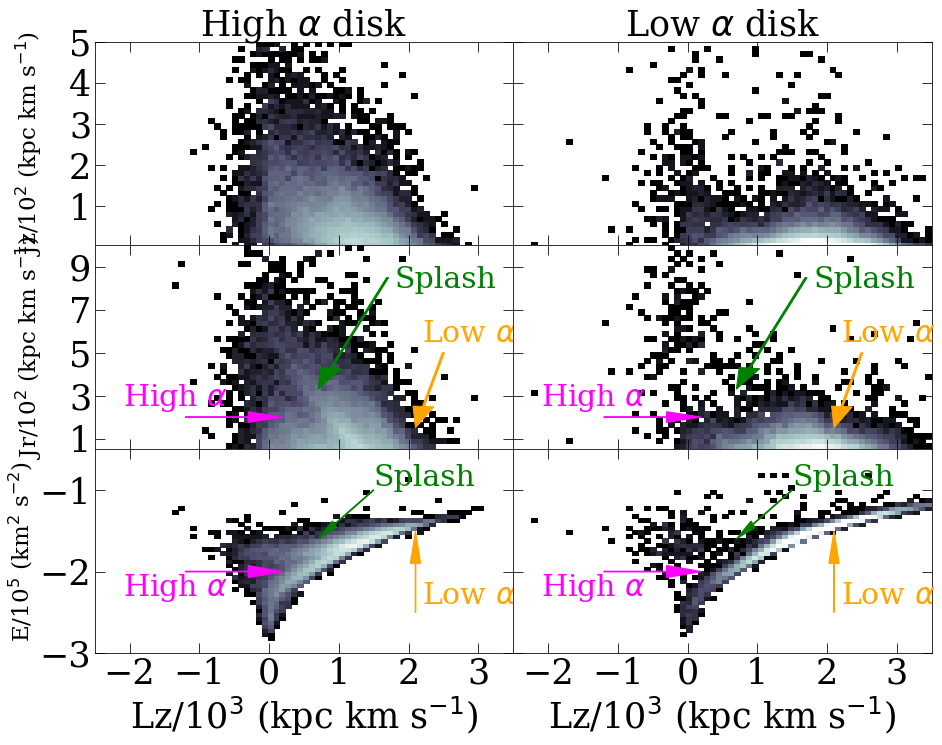

In [87]:
# ACTION PLOTS: In situ sample
import matplotlib as mpl

# create the masks
divline = -0.28*fehs+0.072
eps = 0.04

mask_hiad = ( ((fehs>=-0.9)&(fehs<-0.35)&(mgfe>0.17+eps)) | ((fehs>=-0.35)&(fehs<-0.1)&(mgfe>divline+eps)) \
            | ((fehs>=-0.1)&(mgfe>0.1+eps))   ) 

mask_load = ( ((fehs>=-0.75)&(fehs<-0.35)&(mgfe<0.17-eps)&(mgfe>-0.15)) |  \
              ((fehs>=-0.35)&(fehs<-0.1)&(mgfe<divline-eps)&(mgfe>-0.15)) | \
              ((fehs>=-0.1)&(mgfe<0.1-eps)&(mgfe>-0.15))   ) 

# Get current size
fig_size = plt.rcParams["figure.figsize"]

fig_size[0] = 20
fig_size[1] = 10

#Figure settings (font sizes of ticks and labels)
labs=35
tcks=35
ylabs=23

cmax = 1500

fig= plt.figure(figsize=(15,15),constrained_layout=True)

gs = gridspec.GridSpec(4,2)
gs.update(wspace=0, hspace=0) # set the spacing between axes. 

plt.subplot(gs[0])
plt.hist2d(lz[mask&mask_hiad]/1e3, jz[mask&mask_hiad]/1e2, norm=LogNorm(), bins=(70, 40), range=[[-2.5,3.5],[0,5]], cmap='bone')
plt.title('High $\\alpha$ disk',fontsize=labs)
plt.clim(1,cmax)
plt.xticks((np.arange(-4,4,step=1)),fontsize=tcks)
plt.yticks((np.arange(-1,10,step=1)),fontsize=tcks)
plt.ylabel('Jz/10$^2$ (kpc km s$^{-1}$)',size=ylabs,labelpad=25)
plt.xlim(-2.5,3.5)
plt.ylim(0.05,5)
plt.tick_params(direction='in',right=True,top=True,length=10,labelbottom=False)

ax = plt.subplot(gs[1])
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
ax.yaxis.set_ticks_position("both")
plt.hist2d(lz[mask&mask_load]/1e3, jz[mask&mask_load]/1e2, norm=LogNorm(), bins=(70, 40), range=[[-2.5,3.5],[0,5]], cmap='bone')
plt.title('Low $\\alpha$ disk',fontsize=labs)
plt.clim(1,cmax)
plt.xticks((np.arange(-4,4,step=1)),fontsize=tcks)
plt.yticks((np.arange(-1,10,step=1)),fontsize=tcks)
plt.xlim(-2.5,3.5)
plt.ylim(0.05,5)
plt.tick_params(direction='in',right=True,top=True,length=10,labelbottom=False,labelright=False)

plt.subplot(gs[2])
plt.hist2d(lz[mask&mask_hiad]/1e3, jr[mask&mask_hiad]/1e2, norm=LogNorm(), bins=(70, 40), range=[[-2.5,3.5],[0,10]], cmap='bone')
plt.clim(1,cmax)
plt.xticks((np.arange(-4,4,step=1)),fontsize=tcks)
plt.yticks((np.arange(-1,20,step=2)),fontsize=tcks)
plt.ylabel('Jr/10$^2$ (kpc km s$^{-1}$)',size=ylabs,labelpad=25)
plt.xlim(-2.5,3.5)
plt.ylim(0.5,10)
plt.tick_params(direction='in',right=True,top=True,length=10,labelbottom=False)
plt.arrow(1.7,8.5,-1,-5.2,width=0.03,head_width=0.3,head_length=1.0,length_includes_head=True,color='green')
plt.text(1.8,8.0,'Splash',fontsize=30,color='green')
plt.arrow(-1.2,2,1.4,0,width=0.03,head_width=0.5,head_length=0.5,length_includes_head=True,color='magenta')
plt.text(-2.1,2.5,'High $\\alpha$',fontsize=30,color='magenta')
plt.arrow(2.5,5,-0.4,-3.5,width=0.03,head_width=0.3,head_length=1.0,length_includes_head=True,color='orange')
plt.text(2.2,5.5,'Low $\\alpha$',fontsize=30,color='orange')
#plt.scatter(lz_bg_ins,jr_bg_ins,c='red',alpha=0.8,s=15,lw=0)

ax = plt.subplot(gs[3])
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
ax.yaxis.set_ticks_position("both")
plt.hist2d(lz[mask&mask_load]/1e3, jr[mask&mask_load]/1e2, norm=LogNorm(), bins=(70, 40), range=[[-2.5,3.5],[0,10]], cmap='bone')
plt.clim(1,cmax)
plt.xticks((np.arange(-4,4,step=1)),fontsize=tcks)
plt.yticks((np.arange(-1,10,step=2)),fontsize=tcks)
plt.xlim(-2.5,3.5)
plt.ylim(0.5,10)
plt.arrow(1.7,8.5,-1,-5.2,width=0.03,head_width=0.3,head_length=1.0,length_includes_head=True,color='green')
plt.text(1.8,8.0,'Splash',fontsize=30,color='green')
plt.arrow(-1.2,2,1.4,0,width=0.03,head_width=0.5,head_length=0.5,length_includes_head=True,color='magenta')
plt.text(-2.1,2.5,'High $\\alpha$',fontsize=30,color='magenta')
plt.arrow(2.5,5,-0.4,-3.5,width=0.03,head_width=0.3,head_length=1.0,length_includes_head=True,color='orange')
plt.text(2.2,5.5,'Low $\\alpha$',fontsize=30,color='orange')
plt.tick_params(direction='in',right=True,top=True,length=10,labelbottom=False,labelright=False)

plt.subplot(gs[4])
color = plt.hist2d(lz[mask&mask_hiad]/1e3, E[mask&mask_hiad]/1e5, norm=mpl.colors.LogNorm(), bins=(70, 50),range=[[-2.5,3.5],[-3,-0.5]], cmap='bone')
fig.subplots_adjust()
#plt.colorbar(orientation="horizontal")
plt.clim(1,cmax)
#plt.colorbar()
plt.xticks((np.arange(-10,10,step=1)),fontsize=tcks)
plt.yticks((np.arange(-50,0,step=1)),fontsize=tcks)
plt.xlabel('Lz/10$^3$ (kpc km s$^{-1}$)',size=labs)
plt.ylabel('E/10$^5$ (km$^2$ s$^{-2}$)',size=ylabs)
plt.xlim(-2.5,3.5)
plt.ylim(-3,-0.5)
plt.tick_params(direction='in',right=True,top=True,length=10,labelright=False)
plt.arrow(1.5,-1,-0.8,-0.6,width=0.01,head_width=0.1,head_length=0.3,length_includes_head=True,color='green')
plt.text(1.5,-0.95,'Splash',fontsize=30,color='green')
plt.arrow(-1.2,-2,1.4,0,width=0.01,head_width=0.15,head_length=0.5,length_includes_head=True,color='magenta')
plt.text(-2.1,-2.3,'High $\\alpha$',fontsize=30,color='magenta')
plt.arrow(2.1,-2.5,0,1,width=0.01,head_width=0.15,head_length=0.4,length_includes_head=True,color='orange')
plt.text(2.2,-2.4,'Low $\\alpha$',fontsize=30,color='orange')
#plt.scatter(lz_bg_scc,ener_bg_scc,c='red',alpha=0.8,s=15,lw=0)
#cbar_ax = fig.add_axes([.33, 0.97, 0.39, 0.02])
#fig.colorbar(color[-1],cax=cbar_ax,orientation='horizontal')

ax = plt.subplot(gs[5])
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
ax.yaxis.set_ticks_position("both")
plt.hist2d(lz[mask&mask_load]/1e3, E[mask&mask_load]/1e5, norm=LogNorm(), bins=(70, 50),range=[[-2.5,3.5],[-3,-0.5]], cmap='bone')
plt.tick_params(direction='in',right=True,top=True,length=10,labelright=False)
plt.clim(1,cmax)
#cbaxes = fig.add_axes([0.8, 0.1, 0.03, 0.8]) 
#cb = plt.colorbar(ax1, cax = cbaxes)  
plt.xticks((np.arange(-4,4,step=1)),fontsize=tcks)
plt.yticks((np.arange(-50,0,step=1)),fontsize=tcks)
#plt.ylabel('Jz/10$^2$ (kpc km s$^{-1}$)',size=labs)
plt.xlim(-2.5,3.5)
plt.ylim(-3,-0.5)
plt.arrow(1.5,-1,-0.8,-0.6,width=0.01,head_width=0.1,head_length=0.3,length_includes_head=True,color='green')
plt.text(1.5,-0.95,'Splash',fontsize=30,color='green')
plt.arrow(-1.2,-2,1.4,0,width=0.01,head_width=0.15,head_length=0.5,length_includes_head=True,color='magenta')
plt.text(-2.1,-2.3,'High $\\alpha$',fontsize=30,color='magenta')
plt.arrow(2.1,-2.5,0,1,width=0.01,head_width=0.15,head_length=0.4,length_includes_head=True,color='orange')
plt.text(2.2,-2.4,'Low $\\alpha$',fontsize=30,color='orange')
plt.xlabel('Lz/10$^3$ (kpc km s$^{-1}$)',size=labs)
plt.tick_params(labelright=False)


# Extras not in the paper

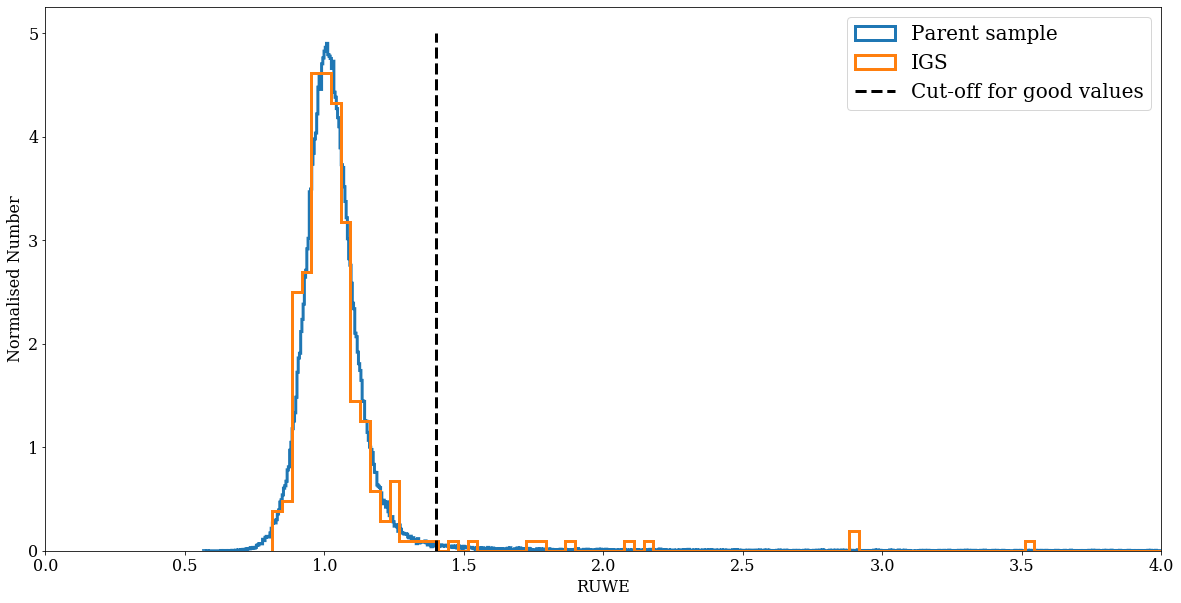

In [117]:
from wand.image import Image as WImage
img = WImage(filename='/Users/qpasa/Desktop/ruwe.png')
img